# Analyse de donn√©es des interviews ministerielles sous les gouvernements Sarkozy et Hollande (LDA, JS divergence, etc.)

### Importation du csv contenant toutes les interviews

In [1]:
import pandas as pd
df_vie_publique = pd.read_csv('/Users/chloe/docs_Jupyter/code_memoire/csv_vie_publique.csv')

### Supprimer les d√©finitions de mots involontairement scrapp√©es

In [2]:
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Ensemble des services de l'√âtat (administration centrale et services d√©concentr√©s) plac√©s sous la responsabilit√© d'un ministre de l'Europe et des affaires √©trang√®res", '', regex=False)
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Organe coll√©gial compos√© du Premier ministre, des ministres et des secr√©taires d'√âtat, charg√© de l'ex√©cution des lois et de la direction de la politique nationale", '', regex=False)
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Acte par lequel le Chef de l'√âtat met fin par anticipation au mandat de l'ensemble des membres d'une assembl√©e parlementaire (en France, seule l'Assembl√©e nationale peut √™tre dissoute)", '', regex=False)
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Organe coll√©gial exer√ßant le pouvoir l√©gislatif (adoption des lois et #contr√¥le du pouvoir ex√©cutif) compos√© de deux chambres : l'Assembl√©e nationale et le S√©nat europ√©en", '', regex=False)
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Monnaie unique de plusieurs √âtats membres de l'Union europ√©enne qui forment la zone euro", '', regex=False)

### Nettoyage des noms dans la colonne intervenants_metiers

In [3]:
import pandas as pd
import unicodedata

# Fonction de nettoyage robuste
def nettoyer_nom(nom):
    if pd.isna(nom):
        return nom
    nom = str(nom).strip() # Supprime les espaces autour
    nom = nom.replace('\xa0', ' ') # Remplace les espaces ins√©cables
    nom = nom.replace('\u200b', '') # Supprime les espaces invisibles
    nom = unicodedata.normalize("NFKC", nom) # Normalisation Unicode 
    return nom

# Application √† la colonne "intervenants_metiers"
df_vie_publique["intervenants_metiers"] = df_vie_publique["intervenants_metiers"].apply(nettoyer_nom)

### Cr√©ation d'un df contenant les interviews sous Valls II 

#### Fillon II : 19 juin 2007 au 14 novembre 2010  

In [4]:
start_date = "2007-06-19"
end_date = "2010-11-14"
df_Fillon2 = df_vie_publique[(df_vie_publique['Date'] >= start_date) & (df_vie_publique['Date'] <= end_date)]
#df_recent

In [5]:
len(df_Fillon2)

3478

#### Suppression des lignes o√π le nom de l'intervenant n'est pas mentionn√©

Plus pr√©cis√©ment : Suppression de toutes les lignes du DataFrame df_Ayrault2 pour lesquelles la colonne 'intervenants_metiers' est soit vide (apr√®s suppression des espaces), soit contient une valeur manquante (NaN)

In [6]:
df_Fillon2 = df_Fillon2[df_Fillon2['intervenants_metiers'].notna() & (df_Fillon2['intervenants_metiers'].str.strip() != '')]


In [7]:
len(df_Fillon2)

3478

#### Ajout d'une colonne "gouvernement" et d'une colonne "mandat"

In [8]:
df_Fillon2['Gouvernement'] = 'Fillon II'
df_Fillon2['Mandat'] = 'Sarkozy'

### Cr√©ation d'un df contenant les interviews sous Holande (Ayrault II et Valls II)

#### Ayrault II : 21 juin 2012 au 31 mars 2014

In [9]:
start_date = "2012-06-21"
end_date = "2014-03-31"
df_Ayrault2 = df_vie_publique[(df_vie_publique['Date'] >= start_date) & (df_vie_publique['Date'] <= end_date)]
#df_recent

In [10]:
df_Ayrault2['Gouvernement'] = 'Ayrault II'
df_Ayrault2['Mandat'] = 'Hollande'

/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/286338919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ayrault2['Gouvernement'] = 'Ayrault II'
/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/286338919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ayrault2['Mandat'] = 'Hollande'


In [11]:
len(df_Ayrault2)

876

#### Suppression des lignes o√π le nom de l'intervenant n'est pas mentionn√©

Idem √† pr√©c√©demment 

In [12]:
df_Ayrault2 = df_Ayrault2[df_Ayrault2['intervenants_metiers'].notna() & (df_Ayrault2['intervenants_metiers'].str.strip() != '')]

In [13]:
len(df_Ayrault2)

876

#### Valls II : 26 ao√ªt 2014 au 6 d√©cembre 2016

In [15]:
start_date = "2014-08-26"
end_date = "2016-12-06"
df_Valls2 = df_vie_publique[(df_vie_publique['Date'] >= start_date) & (df_vie_publique['Date'] <= end_date)]

#### Ajout d'une colonne "gouvernement" et d'une colonne "mandat"

In [16]:
df_Valls2['Gouvernement'] = 'Valls II'
df_Valls2['Mandat'] = 'Hollande'

/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/3842860586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Valls2['Gouvernement'] = 'Valls II'
/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/3842860586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Valls2['Mandat'] = 'Hollande'


In [17]:
len(df_Valls2)

1478

#### Suppression des lignes o√π le nom de l'intervenant n'est pas mentionn√©

Idem √† pr√©c√©demment 

In [18]:
df_Valls2 = df_Valls2[df_Valls2['intervenants_metiers'].notna() & (df_Valls2['intervenants_metiers'].str.strip() != '')]

In [19]:
len(df_Valls2)

1477

#### Merge des gouvernements Ayrault II et Valls II sous "df_Hollande"

In [20]:
df_Hollande = pd.concat([df_Ayrault2, df_Valls2])

### Suppression des interviews o√π il y a plus d'un interview√© ou bien plus d'un journaliste

#### Pour Fillon II 

In [21]:
# importation d'un df contenant l'information du nombre d'intervenants par interview pour Fillon II
too_many_intervenants_Fillon = pd.read_csv('nb_intervenant_FillonII.csv')

Ce df contient une interview par ligne et stocke un intervenant par colonne sous les noms "intervenant1", "intervenant2" et "intervenant3". Si la colonne "intervenant3" est non vide, cela signifie qu'il y a plus de 2 intervenants et donc que nous devons supprimer la ligne (interview)

In [22]:
# S'assurer que les colonnes sont de type string (au cas o√π)
df_Fillon2['link-href'] = df_Fillon2['link-href'].astype(str)
too_many_intervenants_Fillon['link-href'] = too_many_intervenants_Fillon['link-href'].astype(str)

# Identifier les liens √† exclure (o√π intervenant3 est non vide)
liens_a_exclure = too_many_intervenants_Fillon.loc[
    too_many_intervenants_Fillon['intervenant3'].notna() & 
    (too_many_intervenants_Fillon['intervenant3'].astype(str).str.strip() != ''),
    'link-href'
]

# Supprimer les lignes de df_Fillon2 qui ont ces 'link-href'
df_Fillon2 = df_Fillon2[~df_Fillon2['link-href'].isin(liens_a_exclure)]

In [23]:
len(df_Fillon2)

3365

#### Pour Ayrault II

In [24]:
# importation d'un df contenant l'information du nombre d'intervenants par interview pour Ayrault II
too_many_intervenants_Ayrault = pd.read_csv('nb_intervenant_AyraultII.csv')

In [25]:
# S'assurer que les colonnes sont de type string (au cas o√π)
df_Ayrault2['link-href'] = df_Ayrault2['link-href'].astype(str)
too_many_intervenants_Ayrault['link-href'] = too_many_intervenants_Ayrault['link-href'].astype(str)

# Identifier les liens √† exclure (o√π intervenant3 est non vide)
liens_a_exclure = too_many_intervenants_Ayrault.loc[
    too_many_intervenants_Ayrault['intervenant3'].notna() & 
    (too_many_intervenants_Ayrault['intervenant3'].astype(str).str.strip() != ''),
    'link-href'
]

# Supprimer les lignes de df_Fillon2 qui ont ces 'link-href'
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['link-href'].isin(liens_a_exclure)]

In [26]:
len(df_Ayrault2)

850

#### Pour Valls II

In [27]:
# importation d'un df contenant l'information du nombre d'intervenants par interview pour Valls II
too_many_intervenants_Valls = pd.read_csv('nb_intervenant_VallsII.csv')

In [28]:
# S'assurer que les colonnes sont de type string (au cas o√π)
df_Valls2['link-href'] = df_Valls2['link-href'].astype(str)
too_many_intervenants_Valls['link-href'] = too_many_intervenants_Valls['link-href'].astype(str)

# Identifier les liens √† exclure (o√π intervenant3 est non vide)
liens_a_exclure = too_many_intervenants_Valls.loc[
    too_many_intervenants_Valls['intervenant3'].notna() & 
    (too_many_intervenants_Valls['intervenant3'].astype(str).str.strip() != ''),
    'link-href'
]

# Supprimer les lignes de df_Fillon2 qui ont ces 'link-href'
df_Valls2 = df_Valls2[~df_Valls2['link-href'].isin(liens_a_exclure)]

In [29]:
len(df_Valls2)

1470

### Normalisation des noms des m√©dias et suppression des interviews qui ne proviennent pas des m√©dias s√©lectionn√©s 

In [30]:
import pandas as pd
import unicodedata
import re

# Dictionnaire des m√©dias avec leurs variantes
liste_Medias = {
    'Radio Classique': ['Radio Classique', 'RadioClassique'],
    'BFM Radio': ['BFM Radio', 'BFMRadio'],
    'TF1': ['TF1'],
    'TMC': ['TMC'],
    'LCI': ['LCI'],
    'CNews/I-T√©l√©': ['I-T√©l√©', 'I t√©l√©', 'Itele', 'It√©l√©', 'CNews', 'C News', 'I-t√©l√©vision', 'I t√©l√©vision'],
    'M6': ['M6', 'M 6'],
    'BFM TV': ['BFMTV', 'BFM TV'],
    'RMC': ['RMC'],
    'LCP/PubSen': ['LCP', 'Pubsen'],
    'France 3': ['France 3', 'France3', 'FR3', 'FR 3'], 
    'Europe 1': ['Europe 1', 'Europe1'],
    'RTL': ['RTL'],
    'France 2': ['France 2', 'France2', 'FR2', 'FR 2'],
    'C8/D8': ['C8', 'C 8', 'D8', 'D 8'],
    'France Info': ['France Info', 'FranceInfo'],
    'France Culture': ['France Culture'],
    'France 5': ['France 5', 'France5'],
    'Canal+': ['Canal+', 'Canal +', 'Canal Plus'],
    'France Inter': ['France Inter', 'FranceInter'],
    'France 4': ['France 4', 'France4', 'FR4', 'FR 4'],
    'ARTE': ['ARTE']
}

# Fonction de normalisation 
def normalize_text(text):
    text = str(text)
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub(r'[^\w\s+]', ' ', text)  # conserve les "+"
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Fonction de d√©tection des m√©dias 
def detect_media(row):
    found_medias = set()
    media_text = normalize_text(row['Media']) if pd.notnull(row['Media']) else ''
    link_text = normalize_text(row['link']) if pd.notnull(row['link']) else ''

    for media, variants in liste_Medias.items():
        for variant in variants:
            variant_normalized = normalize_text(variant)
            pattern = rf'(?<!\w){re.escape(variant_normalized)}(?=\W|$)'  
            if re.search(pattern, media_text):
                found_medias.add(media)

    if not found_medias:
        for media, variants in liste_Medias.items():
            for variant in variants:
                variant_normalized = normalize_text(variant)
                pattern = rf'(?<!\w){re.escape(variant_normalized)}(?=\W|$)'
                if re.search(pattern, link_text):
                    found_medias.add(media)

    if len(found_medias) == 0:
        return None
    elif len(found_medias) == 1:
        return next(iter(found_medias))
    else:
        return 'multiple'

#### Appliquer √† Df_Fillon2

In [31]:
# √âviter SettingWithCopyWarning
df_Fillon2 = df_Fillon2.copy()
df_Fillon2.loc[:, 'Media_clean'] = df_Fillon2.apply(detect_media, axis=1)

In [32]:
# Supprimer les lignes o√π 'Media_clean' vaut 'multiple' ou est None/NaN
df_Fillon2 = df_Fillon2[~df_Fillon2['Media_clean'].isin(['multiple', None])]
df_Fillon2 = df_Fillon2[df_Fillon2['Media_clean'].notna()]

In [33]:
len(df_Fillon2)

1981

#### Appliquer √† Df_Ayrault2

In [34]:
# √âviter SettingWithCopyWarning
df_Ayrault2 = df_Ayrault2.copy()
df_Ayrault2.loc[:, 'Media_clean'] = df_Ayrault2.apply(detect_media, axis=1)

In [35]:
# Supprimer les lignes o√π 'Media_clean' vaut 'multiple' ou est None/NaN
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['Media_clean'].isin(['multiple', None])]
df_Ayrault2 = df_Ayrault2[df_Ayrault2['Media_clean'].notna()]

In [36]:
len(df_Ayrault2)

515

#### Appliquer √† Df_Valls2

In [37]:
# √âviter SettingWithCopyWarning
df_Valls2 = df_Valls2.copy()
df_Valls2.loc[:, 'Media_clean'] = df_Valls2.apply(detect_media, axis=1)

In [38]:
# Supprimer les lignes o√π 'Media_clean' vaut 'multiple' ou est None/NaN
df_Valls2 = df_Valls2[~df_Valls2['Media_clean'].isin(['multiple', None])]
df_Valls2 = df_Valls2[df_Valls2['Media_clean'].notna()]

In [39]:
len(df_Valls2)

1001

### Ministres et autres personnes repr√©sent√©es dans les interviews sous Hollande

In [40]:
noms_uniques = df_Hollande['intervenants_metiers'].unique()
print(noms_uniques)

['Jean-Marc Ayrault' 'Najat Vallaud-Belkacem' 'H√©l√®ne Conway-Mouret'
 'Pascal Canfin' 'Bernard Cazeneuve' 'Marylise Lebranchu' 'Laurent Fabius'
 'St√©phane Le Foll' 'Jean-Yves Le Drian' 'Fran√ßois Hollande'
 'Manuel Valls' 'Genevi√®ve Fioraso' 'Yamina Benguigui' 'Fran√ßois Lamy'
 'Nicole Bricq' 'Pierre Moscovici' 'Marie-Arlette Carlotti'
 'Victorin Lurel' 'Beno√Æt Hamon' 'Fr√©d√©ric Cuvillier' 'Christiane Taubira'
 'Arnaud Montebourg' 'Alain Vidalies' 'Delphine Batho' 'Vincent Peillon'
 'Sylvia Pinel' 'George Pau-Langevin' 'Dominique Bertinotti'
 'Guillaume Garot' 'J√©r√¥me Cahuzac' 'Fleur Pellerin' 'C√©cile Duflot'
 'Jean-Michel Aphatie' 'Thierry Repentin' 'Marisol Touraine'
 'Michel Sapin' 'Aur√©lie Filippetti' 'Kader Arif' 'Philippe Martin'
 'Mich√®le Delaunay' 'Val√©rie Fourneyron' 'Jean-Marie Le Guen'
 'Harlem D√©sir' 'Fran√ßois Rebsamen' 'Christian Eckert' 'Axelle Lemaire'
 'S√©gol√®ne Royal' 'Thierry Mandon' 'Emmanuel Macron' 'Andr√© Vallini'
 'Myriam El Khomri' 'Annick Girard

In [41]:
len(noms_uniques) 

73

In [42]:
noms_uniques_Ayrault2 = df_Ayrault2['intervenants_metiers'].unique()
print(noms_uniques_Ayrault2)

['Bernard Cazeneuve' 'Laurent Fabius' 'Marylise Lebranchu'
 'H√©l√®ne Conway-Mouret' 'Jean-Marc Ayrault' 'Yamina Benguigui'
 'Fran√ßois Hollande' 'Pascal Canfin' 'Manuel Valls'
 'Najat Vallaud-Belkacem' 'Beno√Æt Hamon' 'Christiane Taubira'
 'Pierre Moscovici' 'Alain Vidalies' 'Jean-Yves Le Drian' 'Delphine Batho'
 'Vincent Peillon' 'Nicole Bricq' 'Arnaud Montebourg' 'St√©phane Le Foll'
 'Dominique Bertinotti' 'J√©r√¥me Cahuzac' 'Guillaume Garot'
 'Fleur Pellerin' 'George Pau-Langevin' 'C√©cile Duflot'
 'Jean-Michel Aphatie' 'Marisol Touraine' 'Michel Sapin'
 'Thierry Repentin' 'Aur√©lie Filippetti' 'Kader Arif' 'Fr√©d√©ric Cuvillier'
 'Fran√ßois Lamy' 'Mich√®le Delaunay' 'Genevi√®ve Fioraso' 'Sylvia Pinel'
 'Philippe Martin']


In [43]:
len(noms_uniques_Ayrault2)

38

In [44]:
noms_uniques_Valls2 = df_Valls2['intervenants_metiers'].unique()
print(noms_uniques_Valls2)

['Jean-Marie Le Guen' 'Michel Sapin' 'Laurent Fabius'
 'Najat Vallaud-Belkacem' 'Harlem D√©sir' 'Bernard Cazeneuve'
 'Fran√ßois Rebsamen' 'Fleur Pellerin' 'St√©phane Le Foll'
 'Marisol Touraine' 'Jean-Yves Le Drian' 'Christiane Taubira'
 'Thierry Mandon' 'Manuel Valls' 'Emmanuel Macron' 'Andr√© Vallini'
 'Sylvia Pinel' 'S√©gol√®ne Royal' 'Christian Eckert' 'Annick Girardin'
 'Matthias Fekl' 'Carole Delga' 'Alain Vidalies' 'Marylise Lebranchu'
 'Fran√ßois Hollande' 'Myriam El Khomri' 'Patrick Kanner' 'Axelle Lemaire'
 'Segol√®ne Neuville' 'Thierry Braillard' 'Pascale Boistard'
 'Laurence Rossignol' 'Jean-Michel Baylet' 'Emmanuelle Cosse'
 'Jean-Marc Ayrault' 'Jean-Jacques Urvoas' 'Jean-Vincent Plac√©'
 'Barbara Pompili' 'H√©l√®ne Geoffroy' 'Juliette Meadel' 'Audrey Azoulay'
 'Clotilde Valter' 'Martine Pinville' 'Christophe Sirugue']


In [45]:
len(noms_uniques_Valls2)

44

### Ministres et autres personnes repr√©sent√©es dans les interviews sous Sarkozy

In [46]:
noms_uniquesFillon2 = df_Fillon2['intervenants_metiers'].unique()
print(noms_uniquesFillon2)

['Christophe Barbier' 'Jean-Claude Mailly' 'Bernard Thibault'
 'Michel Barnier' 'Jean-Marie Bockel' 'Laurent Wauquiez'
 'Christian Estrosi' 'Val√©rie P√©cresse' 'Xavier Bertrand'
 'Jean-Pierre Jouyet' 'Herv√© Morin' 'Jean-Fran√ßois Cope'
 'Patrick Devedjian' 'Jean-Marc Ayrault' 'Dominique Bussereau'
 'Bernard Accoyer' 'Christine Lagarde' 'Eric Besson' 'Luc Chatel'
 'Jean-Pierre Raffarin' 'Fran√ßois Hollande' 'Christine Boutin'
 'Jean-Louis Borloo' 'Rachida Dati' 'Martin Hirsch' 'Fran√ßois Sauvadet'
 'Roselyne Bachelot-Narquin' 'Fran√ßois Ch√©r√®que' 'Eric Woerth'
 'Fran√ßois Fillon' 'Nathalie Kosciusko-Morizet' 'Rama Yade'
 'Bernard Kouchner' 'Andr√© Santini' 'Jean-Marie Le Pen' 'Herv√© Novelli'
 'Jean-Michel Lemetayer' 'Laurence Parisot' 'Bernard Van Craeynest'
 'Xavier Darcos' 'Christine Albanel' 'Jean-Michel Aphatie'
 'Brice Hortefeux' 'Mich√®le Alliot-Marie' 'Fran√ßois Bayrou'
 'Roger Karoutchi' 'Jean-Fran√ßois Roubaud' 'Philippe de Villiers'
 'Jean-Claude Gaudin' 'Alain Marleix' '

### Ministres en fonction sous Fillon II

In [47]:
ministres_FillonII = ['Fran√ßois Fillon',
                      'Jean-Louis Borloo',
                      'Mich√®le Alliot-Marie',
                      'Bernard Kouchner',
                      'Christine Lagarde',
                      'Brice Hortefeux',
                      'Rachida Dati',
                      'Michel Barnier',
                      'Xavier Bertrand',
                      'Xavier Darcos',
                      'Val√©rie P√©cresse',
                      'Herv√© Morin',
                      'Roselyne Bachelot-Narquin',
                      'Christine Boutin',
                      'Christine Albanel',
                      '√âric Woerth',
                      'Patrick Devedjian',
                      '√âric Besson',
                      'Luc Chatel',
                      'Bruno Le Maire', 'Fr√©d√©ric Mitterrand', 'Michel Mercier', 'Henri de Raincourt', 'Christian Estrosi','Marie-Luce Penchard', 'Fran√ßois Baroin', 'Marc-Philippe Daubresse'                  
                     ] 

In [48]:
def nettoyer_liste(liste):
    return [nettoyer_nom(nom) for nom in liste]

In [49]:
ministres_FillonII = nettoyer_liste(ministres_FillonII)

### Identifier les noms de ministres diff√©remments orthographi√©s

#### Afficher les noms des personnes interview√©es qui ne sont pas dans la liste des ministres

In [50]:
diffFillon2 = [x for x in noms_uniquesFillon2 if x not in ministres_FillonII]
print(diffFillon2)

['Christophe Barbier', 'Jean-Claude Mailly', 'Bernard Thibault', 'Jean-Marie Bockel', 'Laurent Wauquiez', 'Jean-Pierre Jouyet', 'Jean-Fran√ßois Cope', 'Jean-Marc Ayrault', 'Dominique Bussereau', 'Bernard Accoyer', 'Eric Besson', 'Jean-Pierre Raffarin', 'Fran√ßois Hollande', 'Martin Hirsch', 'Fran√ßois Sauvadet', 'Fran√ßois Ch√©r√®que', 'Eric Woerth', 'Nathalie Kosciusko-Morizet', 'Rama Yade', 'Andr√© Santini', 'Jean-Marie Le Pen', 'Herv√© Novelli', 'Jean-Michel Lemetayer', 'Laurence Parisot', 'Bernard Van Craeynest', 'Jean-Michel Aphatie', 'Fran√ßois Bayrou', 'Roger Karoutchi', 'Jean-Fran√ßois Roubaud', 'Philippe de Villiers', 'Jean-Claude Gaudin', 'Alain Marleix', 'Beno√Æt Hamon', 'Fadela Amara', 'Bernard Laporte', 'Nicolas Sarkozy', 'Val√©rie L√©tard', 'Nadine Morano', 'Alain Joyandet', 'Yves J√©go', 'G√©rard Aschieri', 'Olivier Besancenot', 'G√©rard Larcher', 'Jean-Michel Baylet', 'Anne-Marie Idrac', 'Chantal Jouanno', 'Christian Blanc', 'Martine Aubry', 'Nora Berra', 'Pierre Lellou

#### Trouver si il y a des duplicats des noms (nom de ministres diff√©remment orthographi√©s)

In [51]:
import pandas as pd
from difflib import SequenceMatcher 
def top_n_similar_names(list_a, list_b, top_n=5):
    all_matches = []
    for name_a in list_a:
        for name_b in list_b:
            similarity = SequenceMatcher(None, name_a.lower(), name_b.lower()).ratio()
            all_matches.append((name_a, name_b, round(similarity, 2)))
    sorted_matches = sorted(all_matches, key=lambda x: x[2], reverse=True)
    return pd.DataFrame(sorted_matches[:top_n], columns=["Nom Liste A", "Nom Liste B", "Score Similarit√©"])


In [52]:
# Ex√©cution de la fonction
resultat = top_n_similar_names(diffFillon2, ministres_FillonII, top_n=5)
print(resultat)

         Nom Liste A       Nom Liste B  Score Similarit√©
0        Eric Besson       √âric Besson              0.91
1        Eric Woerth       √âric Woerth              0.91
2    Fran√ßois Bayrou   Fran√ßois Baroin              0.87
3  Fran√ßois Hollande   Fran√ßois Fillon              0.75
4    Bernard Accoyer  Bernard Kouchner              0.71


On obtient des noms diff√©remment orthographi√©s pour Eric Bessom et Eric Woerth

#### Normaliser les noms des ministres

Modifier le df pour remplacer Eric Woerth par '√âric Woerth' dans intervenants_metier 

Pareil pour 'Eric Besson' en '√âric Besson'

In [53]:
# Remplacer 'Eric Besson' par '√âric Besson' et 'Eric Woerth' par '√âric Woerth'
df_Fillon2['intervenants_metiers'] = df_Fillon2['intervenants_metiers'].str.replace('Eric Besson', '√âric Besson')
df_Fillon2['intervenants_metiers'] = df_Fillon2['intervenants_metiers'].str.replace('Eric Woerth', '√âric Woerth')

### Ministres en fonction sous Ayrault II

In [54]:
ministres_AyraultII = ['Jean-Marc Ayrault',
                       'Laurent Fabius',
                       'Vincent Peillon',
                       'Christiane Taubira',
                       'Pierre Moscovici',
                       'Marisol Touraine',
                       'C√©cile Duflot',
                       'Manuel Valls',
                       'Nicole Bricq',
                       'Arnaud Montebourg',
                       'Delphine Batho',
                       'Michel Sapin',
                       'Jean-Yves Le Drian',
                       'Aur√©lie Filippetti',
                       'Genevi√®ve Fioraso',
                       'Najat Vallaud-Belkacem',
                       'St√©phane Le Foll', 'Marylise Lebranchu', 'Victorin Lurel', 'Sylvia Pinel', 'Val√©rie Fourneyron', 'Philippe Martin'
    ]

In [55]:
ministres_AyraultII = nettoyer_liste(ministres_AyraultII)

#### Afficher les noms des personnes interview√©es qui ne sont pas dans la liste des ministres

In [56]:
diffAyrault2 = [y for y in noms_uniques_Ayrault2 if y not in ministres_AyraultII]
print(diffAyrault2)

['Bernard Cazeneuve', 'H√©l√®ne Conway-Mouret', 'Yamina Benguigui', 'Fran√ßois Hollande', 'Pascal Canfin', 'Beno√Æt Hamon', 'Alain Vidalies', 'Dominique Bertinotti', 'J√©r√¥me Cahuzac', 'Guillaume Garot', 'Fleur Pellerin', 'George Pau-Langevin', 'Jean-Michel Aphatie', 'Thierry Repentin', 'Kader Arif', 'Fr√©d√©ric Cuvillier', 'Fran√ßois Lamy', 'Mich√®le Delaunay']


#### Trouver si il y a des duplicats des noms (nom de ministres diff√©remment orthographi√©s)

In [57]:
# Ex√©cution de la fonction
resultat = top_n_similar_names(diffAyrault2, ministres_AyraultII, top_n=5)
print(resultat)

           Nom Liste A        Nom Liste B  Score Similarit√©
0  Jean-Michel Aphatie       Michel Sapin              0.65
1  Jean-Michel Aphatie  Jean-Marc Ayrault              0.61
2     Mich√®le Delaunay       Michel Sapin              0.57
3        Pascal Canfin   Marisol Touraine              0.48
4        Pascal Canfin       Michel Sapin              0.48


In [58]:
#pas de noms dont l'orthographe diff√®re

### Ministres en fonction sous Valls II

In [59]:
ministres_VallsII = ['Manuel Valls',
                     'Laurent Fabius',
                     'S√©gol√®ne Royal',
                     'Najat Vallaud-Belkacem',
                     'Christiane Taubira',
                     'Michel Sapin',
                     'Jean-Yves Le Drian',
                     'Marisol Touraine',
                     'Fran√ßois Rebsamen',
                     'Bernard Cazeneuve',
                     'St√©phane Le Foll', 'Emmanuel Macron', 'Sylvia Pinel', 'Marylise Lebranchu', 'Fleur Pellerin', 'Patrick Kanner', 'George Pau-Langevin', 'Myriam El Khomri', 'Jean-Jacques Urvoas', 'Jean-Marc Ayrault','Jean-Michel Baylet','Emmanuelle Cosse', 'Audrey Azoulay', 'Laurence Rossignol', 'Ericka Bareigts'
]

In [60]:
ministres_VallsII = nettoyer_liste(ministres_VallsII)

#### Afficher les noms des personnes interview√©es qui ne sont pas dans la liste des ministres

In [61]:
diffValls2 = [z for z in noms_uniques_Valls2 if z not in ministres_VallsII]
print(diffValls2)

['Jean-Marie Le Guen', 'Harlem D√©sir', 'Thierry Mandon', 'Andr√© Vallini', 'Christian Eckert', 'Annick Girardin', 'Matthias Fekl', 'Carole Delga', 'Alain Vidalies', 'Fran√ßois Hollande', 'Axelle Lemaire', 'Segol√®ne Neuville', 'Thierry Braillard', 'Pascale Boistard', 'Jean-Vincent Plac√©', 'Barbara Pompili', 'H√©l√®ne Geoffroy', 'Juliette Meadel', 'Clotilde Valter', 'Martine Pinville', 'Christophe Sirugue']


In [62]:
noms_uniques_Valls2

array(['Jean-Marie Le Guen', 'Michel Sapin', 'Laurent Fabius',
       'Najat Vallaud-Belkacem', 'Harlem D√©sir', 'Bernard Cazeneuve',
       'Fran√ßois Rebsamen', 'Fleur Pellerin', 'St√©phane Le Foll',
       'Marisol Touraine', 'Jean-Yves Le Drian', 'Christiane Taubira',
       'Thierry Mandon', 'Manuel Valls', 'Emmanuel Macron',
       'Andr√© Vallini', 'Sylvia Pinel', 'S√©gol√®ne Royal',
       'Christian Eckert', 'Annick Girardin', 'Matthias Fekl',
       'Carole Delga', 'Alain Vidalies', 'Marylise Lebranchu',
       'Fran√ßois Hollande', 'Myriam El Khomri', 'Patrick Kanner',
       'Axelle Lemaire', 'Segol√®ne Neuville', 'Thierry Braillard',
       'Pascale Boistard', 'Laurence Rossignol', 'Jean-Michel Baylet',
       'Emmanuelle Cosse', 'Jean-Marc Ayrault', 'Jean-Jacques Urvoas',
       'Jean-Vincent Plac√©', 'Barbara Pompili', 'H√©l√®ne Geoffroy',
       'Juliette Meadel', 'Audrey Azoulay', 'Clotilde Valter',
       'Martine Pinville', 'Christophe Sirugue'], dtype=object)

#### Trouver si il y a des duplicats des noms (nom de ministres diff√©remment orthographi√©s)

In [63]:
import pandas as pd
from difflib import SequenceMatcher

# Fonction qui force tout en string et compare
def top_n_similar_names(list_a, list_b, top_n=5):
    list_a = [str(name) for name in list_a]
    list_b = [str(name) for name in list_b]
    
    all_matches = []
    for name_a in list_a:
        for name_b in list_b:
            similarity = SequenceMatcher(None, name_a.lower(), name_b.lower()).ratio()
            all_matches.append((name_a, name_b, round(similarity, 2)))
    sorted_matches = sorted(all_matches, key=lambda x: x[2], reverse=True)
    return pd.DataFrame(sorted_matches[:top_n], columns=["Nom Liste A", "Nom Liste B", "Score Similarit√©"])

# Utilisation
resultat = top_n_similar_names(diffValls2, ministres_VallsII, top_n=5)
print(resultat)


          Nom Liste A         Nom Liste B  Score Similarit√©
0    Christian Eckert  Christiane Taubira              0.65
1   Fran√ßois Hollande   Fran√ßois Rebsamen              0.65
2     H√©l√®ne Geoffroy      S√©gol√®ne Royal              0.62
3  Jean-Marie Le Guen  Jean-Yves Le Drian              0.61
4   Segol√®ne Neuville      S√©gol√®ne Royal              0.58


In [64]:
#pas de noms dont l'orthographe diff√®re

### Partis des ministres sous Fillon II

In [65]:
ministres_FillonII_parti = {'Fran√ßois Fillon' : 'UMP',
                      'Jean-Louis Borloo': 'PR',
                      'Mich√®le Alliot-Marie': 'UMP',
                      'Bernard Kouchner': 'DVG',
                      'Christine Lagarde': 'UMP',
                      'Brice Hortefeux': 'UMP',
                      'Rachida Dati': 'UMP',
                      'Michel Barnier': 'UMP',
                      'Xavier Bertrand': 'UMP',
                      'Xavier Darcos':'UMP',
                      'Val√©rie P√©cresse':'UMP',
                      'Herv√© Morin':'LC',
                      'Roselyne Bachelot-Narquin':'UMP',
                      'Christine Boutin':'UMP',
                      'Christine Albanel':'UMP',
                      '√âric Woerth':'UMP',
                      'Patrick Devedjian':'UMP',
                      '√âric Besson':'UMP',
                      'Luc Chatel':'UMP',
                      'Bruno Le Maire':'UMP', 
                      'Fr√©d√©ric Mitterrand':'DVG',
                      'Michel Mercier': 'UMP',
                      'Henri de Raincourt': 'UMP', 
                      'Christian Estrosi': 'UMP',
                      'Marie-Luce Penchard':'UMP',
                      'Fran√ßois Baroin':'UMP', 
                      'Marc-Philippe Daubresse':'UMP'
                       }

### Partis des ministres sous Ayrault II

In [66]:
ministres_AyraultII_parti =  {'Jean-Marc Ayrault':'PS',
                       'Laurent Fabius':'PS',
                       'Vincent Peillon':'PS',
                       'Christiane Taubira':'PRG',
                       'Pierre Moscovici':'PS',
                       'Marisol Touraine':'PS',
                       'C√©cile Duflot':'EELV',
                       'Manuel Valls':'PS',
                       'Nicole Bricq':'PS',
                       'Arnaud Montebourg':'PS',
                       'Delphine Batho':'PS',
                       'Michel Sapin':'PS',
                       'Jean-Yves Le Drian':'PS',
                       'Aur√©lie Filippetti':'PS',
                       'Genevi√®ve Fioraso':'PS',
                       'Najat Vallaud-Belkacem':'PS',
                       'St√©phane Le Foll':'PS',
                             'Marylise Lebranchu':'PS',
                             'Victorin Lurel':'PS', 
                             'Sylvia Pinel':'PRG', 
                             'Val√©rie Fourneyron':'PS',
                             'Philippe Martin':'PS'
     }

### Partis des ministres sous Valls II

In [67]:
ministres_VallsII_parti = {'Manuel Valls':'PS',
                     'Laurent Fabius':'PS',
                     'S√©gol√®ne Royal':'PS',
                     'Najat Vallaud-Belkacem':'PS',
                     'Christiane Taubira':'PRG',
                     'Michel Sapin':'PS',
                     'Jean-Yves Le Drian':'PS',
                     'Marisol Touraine':'PS',
                     'Fran√ßois Rebsamen':'PS',
                     'Bernard Cazeneuve':'PS',
                     'St√©phane Le Foll':'PS',
                     'Emmanuel Macron':'PS',
                     'Sylvia Pinel':'PRG',
                     'Marylise Lebranchu':'PS',
                     'Fleur Pellerin':'PS',
                     'Patrick Kanner':'PS',
                     'George Pau-Langevin':'PS',
                     'Myriam El Khomri':'PS',
                     'Jean-Jacques Urvoas':'PS',
                     'Jean-Marc Ayrault':'PS',
                     'Jean-Michel Baylet':'PRG',
                     'Emmanuelle Cosse':'PE',
                     'Audrey Azoulay':'PS',
                     'Laurence Rossignol':'PS',
                     'Ericka Bareigts':'PS'
 }

### dictionnaire de Correspondance Parti : id du CHES

In [68]:
dict_corr_parti_score = { 
    'UMP' :'609',
    'PR':'622',
    'LC':'621',
    'PS':'602',
    'PRG':'603',
    'EELV':'605'   
}

### Trier les interviews des personnes r√©colt√©es sous chaque gouvernement

Ne garder que les ministres

In [69]:
# Conserver uniquement les lignes dont l'intervenant figure dans la liste ministres_FillonII
df_Fillon2 = df_Fillon2[df_Fillon2['intervenants_metiers'].isin(ministres_FillonII)]

In [70]:
len(df_Fillon2)

1105

In [71]:
df_Ayrault2 = df_Ayrault2[df_Ayrault2['intervenants_metiers'].isin(ministres_AyraultII)]

In [72]:
len(df_Ayrault2)

376

In [73]:
df_Valls2 = df_Valls2[df_Valls2['intervenants_metiers'].isin(ministres_VallsII)]

In [74]:
len(df_Valls2)

706

### Quels ministres ne sont pas repr√©sent√©s dans mon df ?

#### Sous Fillon II

In [75]:
# Convertir les valeurs de la colonne en set pour comparaison rapide
intervenants_present = set(df_Fillon2['intervenants_metiers'].dropna().unique())

# Identifier les ministres absents
ministres_absents = [nom for nom in ministres_FillonII if nom not in intervenants_present]

# Affichage
print("Ministres de la liste non pr√©sents dans le DataFrame :")
for nom in ministres_absents:
    print("-", nom)

Ministres de la liste non pr√©sents dans le DataFrame :
- Marc-Philippe Daubresse


#### Sous Ayrault II

In [76]:
# Convertir les valeurs de la colonne en set pour comparaison rapide
intervenants_present = set(df_Ayrault2['intervenants_metiers'].dropna().unique())

# Identifier les ministres absents
ministres_absents = [nom for nom in ministres_AyraultII if nom not in intervenants_present]

# Affichage
print("Ministres de la liste non pr√©sents dans le DataFrame :")
for nom in ministres_absents:
    print("-", nom)

Ministres de la liste non pr√©sents dans le DataFrame :
- Victorin Lurel
- Val√©rie Fourneyron


#### Sous Valls II

In [77]:
# Convertir les valeurs de la colonne en set pour comparaison rapide
intervenants_present = set(df_Valls2['intervenants_metiers'].dropna().unique())

# Identifier les ministres absents
ministres_absents = [nom for nom in ministres_VallsII if nom not in intervenants_present]

# Affichage
print("Ministres de la liste non pr√©sents dans le DataFrame :")
for nom in ministres_absents:
    print("-", nom)

Ministres de la liste non pr√©sents dans le DataFrame :
- George Pau-Langevin
- Ericka Bareigts


### Graphiques repr√©sentant le nombre d'interviews par ministres dans les diff√©rents gouvernements

#### Sous Fillon II

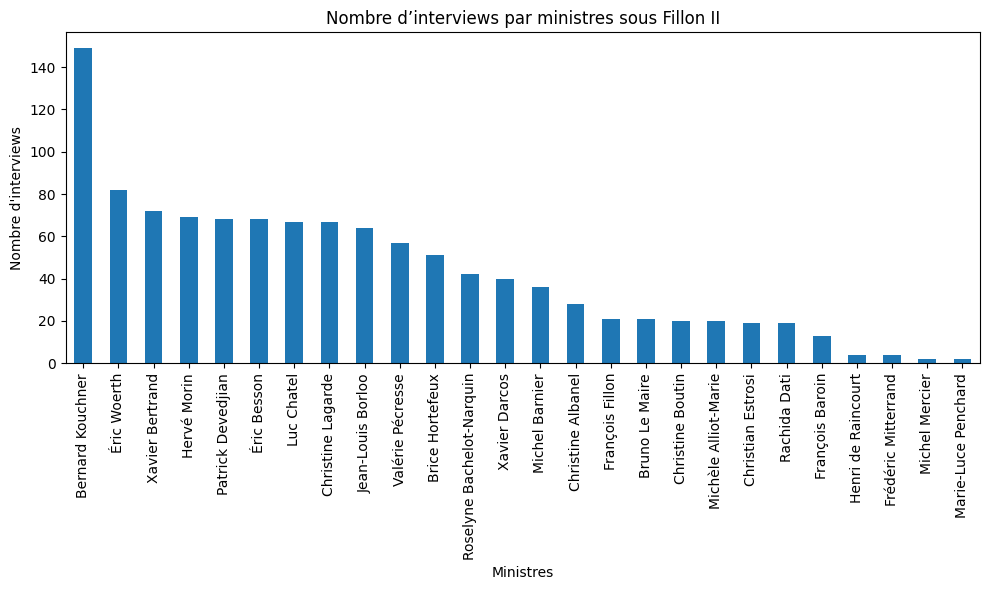

In [78]:
import matplotlib.pyplot as plt

# Compter les occurrences
counts = df_Fillon2['intervenants_metiers'].value_counts()

# Tracer le graphique
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title("Nombre d‚Äôinterviews par ministres sous Fillon II")
plt.xlabel("Ministres")
plt.ylabel("Nombre d'interviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Sous Ayrault II

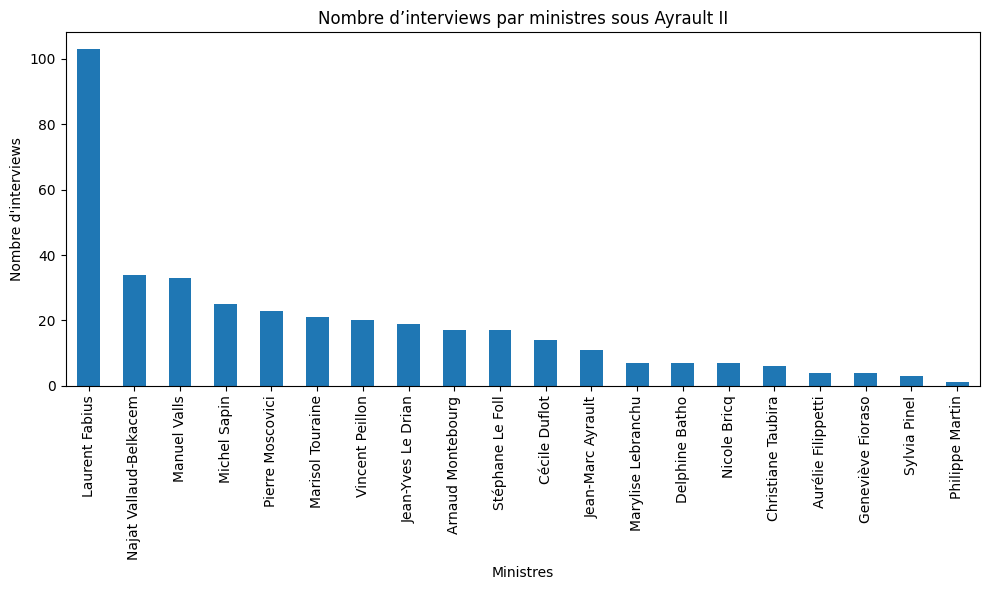

In [79]:
import matplotlib.pyplot as plt

# Compter les occurrences
counts = df_Ayrault2['intervenants_metiers'].value_counts()

# Tracer le graphique
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title("Nombre d‚Äôinterviews par ministres sous Ayrault II")
plt.xlabel("Ministres")
plt.ylabel("Nombre d'interviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Sous Valls II

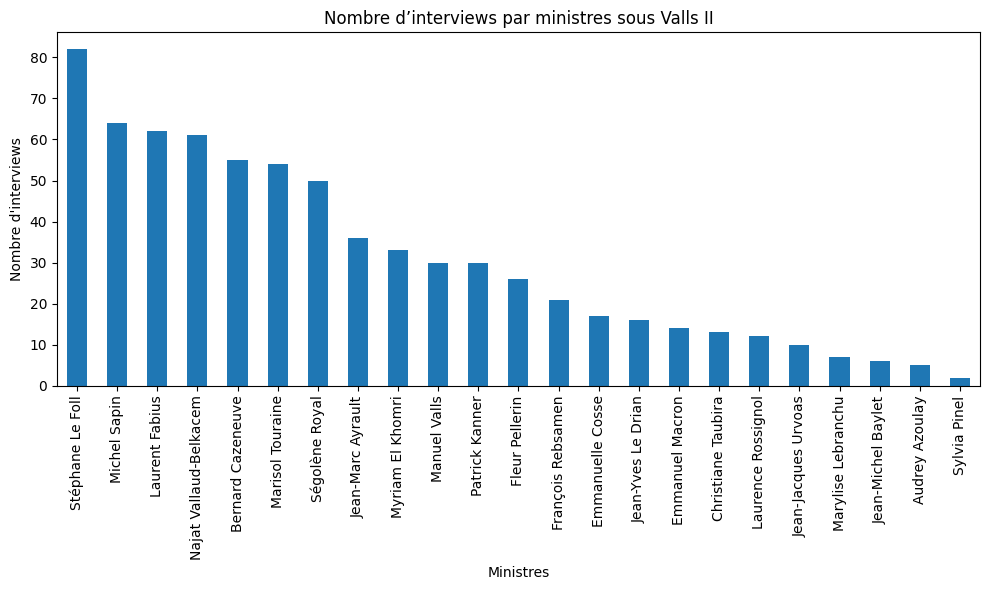

In [80]:
import matplotlib.pyplot as plt

# Compter les occurrences
counts = df_Valls2['intervenants_metiers'].value_counts()

# Tracer le graphique
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title("Nombre d‚Äôinterviews par ministres sous Valls II")
plt.xlabel("Ministres")
plt.ylabel("Nombre d'interviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Combien de ministres repr√©sent√©s dans les df apr√®s nettoyage

In [81]:
noms_uniques_Fillon2 = df_Fillon2['intervenants_metiers'].unique()

In [82]:
len(noms_uniques_Fillon2)

26

In [83]:
noms_uniques_Ayrault2 = df_Ayrault2['intervenants_metiers'].unique()

In [84]:
len(noms_uniques_Ayrault2)

20

In [85]:
noms_uniques_Valls2 = df_Valls2['intervenants_metiers'].unique()

In [86]:
len(noms_uniques_Valls2)

23

### Quels sont les diff√©rents m√©dias repr√©sent√©s dans mon corpus

#### Sous Fillon II

In [87]:
noms_uniques_Ayrault2 = df_Ayrault2['Media'].unique()

In [88]:
len(noms_uniques_Ayrault2)

36

#### Sous Fillon II

In [89]:
noms_uniques_Fillon2 = df_Fillon2['Media'].unique()

In [90]:
len(noms_uniques_Fillon2)

56

#### Sous Valls II

In [91]:
noms_uniques_Valls2 = df_Valls2['Media'].unique()

In [92]:
len(noms_uniques_Valls2)

44

### Graphique du nombre d'interview par m√©dias pour toutes mes donn√©es 

In [93]:
Total_df = pd.concat([ df_Fillon2, df_Ayrault2, df_Valls2], ignore_index=True)

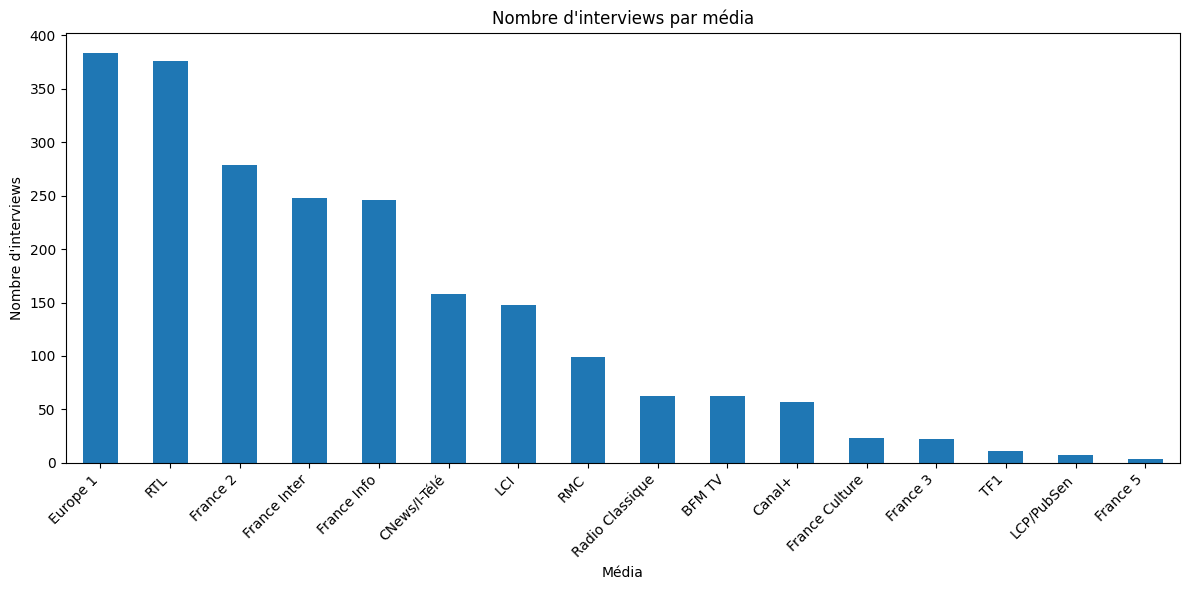

In [94]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque m√©dia
media_counts = Total_df['Media_clean'].value_counts()

# Tracer le graphique en barres
plt.figure(figsize=(12, 6))
media_counts.plot(kind='bar')

# Personnalisation
plt.title("Nombre d'interviews par m√©dia")
plt.xlabel("M√©dia")
plt.ylabel("Nombre d'interviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [95]:
noms_medias_total = Total_df['Media_clean'].unique()

In [96]:
noms_medias_total

array(['France Inter', 'France 2', 'France Info', 'RTL', 'RMC', 'LCI',
       'Europe 1', 'CNews/I-T√©l√©', 'Radio Classique', 'Canal+',
       'France 3', 'TF1', 'BFM TV', 'France 5', 'France Culture',
       'LCP/PubSen'], dtype=object)

### Ajout d'une colonne "parti_ministre" et d'une colonne "score_ministre"

### Importation du csv Hills Survey 1999-2019

In [97]:
import pandas as pd

# Charger les donn√©es
df = pd.read_csv('1999-2019_CHES_dataset_means.csv')

### Garder uniquement les donn√©es sur la France et les ann√©es 2002 √† 2019

In [98]:
df_france = df[(df['country'] == 6) & (df['year'].between(2002, 2019))]

In [99]:
print(sorted(df_france['year'].dropna().unique()))


[2002, 2006, 2010, 2014, 2019]


### Ajout des colonnes scores pour les minsitre pour df_Fillon2

In [101]:
def trouver_score_proche(row):
    pid = row['party_id']
    annee = row['year']
    
    # Scores disponibles pour ce parti
    scores_parti = df_france[df_france['party_id'] == pid]
    
    if scores_parti.empty:
        return None
    
    # Si l'ann√©e existe, prendre directement le score
    if annee in scores_parti['year'].values:
        return scores_parti.loc[scores_parti['year'] == annee, 'lrgen'].values[0]
    
    # Sinon, trouver l'ann√©e la plus proche
    scores_parti = scores_parti.copy()
    scores_parti['ecart'] = abs(scores_parti['year'] - annee)
    score_proche = scores_parti.sort_values(by='ecart').iloc[0]['lrgen']
    
    return score_proche

In [102]:
df_france = df_france.copy()
df_Fillon2 = df_Fillon2.copy()

df_Fillon2['parti_ministre'] = df_Fillon2['intervenants_metiers'].map(ministres_FillonII_parti)
df_Fillon2['party_id'] = df_Fillon2['parti_ministre'].map(dict_corr_parti_score)
df_Fillon2['party_id'] = df_Fillon2['party_id'].astype(str)
df_france['party_id'] = df_france['party_id'].astype(str)
df_Fillon2['year'] = pd.to_datetime(df_Fillon2['Date'], errors='coerce').dt.year.astype('Int64')
df_france['year'] = df_france['year'].astype('Int64')

In [103]:
df_Fillon2['score_ministre'] = df_Fillon2.apply(trouver_score_proche, axis=1)

In [104]:
def corriger_score(row):
    if pd.notna(row['score_ministre']):
        return row['score_ministre']
    year = row['year']
    if row['parti_ministre'] == 'DVD':
        ref = df_france[df_france['party_id'] == dict_corr_parti_score['PS']]
    elif row['parti_ministre'] == 'DVG':
        ref = df_france[df_france['party_id'] == dict_corr_parti_score['UMP']]
    elif row['parti_ministre'] == 'PE':
        ref = df_france[df_france['party_id'] == dict_corr_parti_score['PS']]
    else:
        return None

    if ref.empty:
        return None
    ref['ecart'] = abs(ref['year'] - year)
    score_base = ref.sort_values(by='ecart').iloc[0]['lrgen']
    
    if row['parti_ministre'] == 'DVD':
        return score_base + 1.5
    elif row['parti_ministre'] == 'DVG':
        return score_base - 1.5
    elif row['parti_ministre'] == 'PE':
        return score_base - 0.5

In [105]:
df_Fillon2['score_ministre'] = df_Fillon2.apply(corriger_score, axis=1)

### Ajout des colonnes scores pour les ministres pour df_Ayrault2

In [107]:
df_france = df_france.copy()
df_Ayrault2 = df_Ayrault2.copy()

df_Ayrault2['parti_ministre'] = df_Ayrault2['intervenants_metiers'].map(ministres_AyraultII_parti)
df_Ayrault2['party_id'] = df_Ayrault2['parti_ministre'].map(dict_corr_parti_score)
df_Ayrault2['party_id'] = df_Ayrault2['party_id'].astype(str)
df_france['party_id'] = df_france['party_id'].astype(str)
df_Ayrault2['year'] = pd.to_datetime(df_Ayrault2['Date'], errors='coerce').dt.year.astype('Int64')
df_france['year'] = df_france['year'].astype('Int64')

In [108]:
df_Ayrault2['score_ministre'] = df_Ayrault2.apply(trouver_score_proche, axis=1)

In [109]:
df_Ayrault2['score_ministre'] = df_Ayrault2.apply(corriger_score, axis=1)

### Ajout des colonnes scores pour les ministres pour df_Valls2

In [110]:
df_france = df_france.copy()
df_Valls2 = df_Valls2.copy()

df_Valls2['parti_ministre'] = df_Valls2['intervenants_metiers'].map(ministres_VallsII_parti)
df_Valls2['party_id'] = df_Valls2['parti_ministre'].map(dict_corr_parti_score)
df_Valls2['party_id'] = df_Valls2['party_id'].astype(str)
df_france['party_id'] = df_france['party_id'].astype(str)
df_Valls2['year'] = pd.to_datetime(df_Valls2['Date'], errors='coerce').dt.year.astype('Int64')
df_france['year'] = df_france['year'].astype('Int64')

In [111]:
df_Valls2['score_ministre'] = df_Valls2.apply(trouver_score_proche, axis=1)

In [112]:
df_Valls2['score_ministre'] = df_Valls2.apply(corriger_score, axis=1)

## Ajouter le score de chaque m√©dia pour chaque interview

In [113]:
df_score_media = pd.read_csv('/Users/chloe/docs_Jupyter/code_memoire/score_media.csv')

### Pour Fillon II

In [114]:
# S'assurer que les noms de m√©dias sont bien du m√™me type (str)
df_Fillon2['Media_clean'] = df_Fillon2['Media_clean'].astype(str)
df_score_media['Media'] = df_score_media['Media'].astype(str)

# Cr√©er un dictionnaire de correspondance Media ‚Üí Score
dict_score_media = dict(zip(df_score_media['Media'], df_score_media['Score_normalise']))

# Ajouter la colonne 'score_media' dans df_Fillon2
df_Fillon2['score_media'] = df_Fillon2['Media_clean'].map(dict_score_media)

### Pour Ayrault II

In [116]:
# S'assurer que les noms de m√©dias sont bien du m√™me type (str)
df_Ayrault2['Media_clean'] = df_Ayrault2['Media_clean'].astype(str)
df_score_media['Media'] = df_score_media['Media'].astype(str)

# Cr√©er un dictionnaire de correspondance Media ‚Üí Score
dict_score_media = dict(zip(df_score_media['Media'], df_score_media['Score_normalise']))

# Ajouter la colonne 'score_media' dans df_Fillon2
df_Ayrault2['score_media'] = df_Ayrault2['Media_clean'].map(dict_score_media)

### Pour Valls II

In [117]:
# S'assurer que les noms de m√©dias sont bien du m√™me type (str)
df_Valls2['Media_clean'] = df_Valls2['Media_clean'].astype(str)
df_score_media['Media'] = df_score_media['Media'].astype(str)

# Cr√©er un dictionnaire de correspondance Media ‚Üí Score
dict_score_media = dict(zip(df_score_media['Media'], df_score_media['Score_normalise']))

# Ajouter la colonne 'score_media' dans df_Fillon2
df_Valls2['score_media'] = df_Valls2['Media_clean'].map(dict_score_media)


## Nettoyage des donn√©es avant LDA

### Importation des librairies et "fr_core_news_lg"

In [118]:
import spacy
import re 

In [119]:
nlp = spacy.load("fr_core_news_lg")

### Couper le df pour avoir une case par intervention (gr√¢ce au "\n" et "Q-" et "R-")

In [120]:
def split_interventions(text):
    # D√©coupe par \n, R - , Q - , Q-, et √©limine les espaces et retours √† la ligne
    split_text = re.split(r'\s*(?:\n|R\s*-|Q\s*-|Q-)\s*', text)
    return split_text

#### Appliquer √† df_Fillon2

In [121]:
df_Fillon2 = df_Fillon2.assign(Texte=df_Fillon2["Texte"].apply(split_interventions)).explode("Texte").reset_index(drop=True)

#### Appliquer √† df_Ayrault2

In [122]:
df_Ayrault2 = df_Ayrault2.assign(Texte=df_Ayrault2["Texte"].apply(split_interventions)).explode("Texte").reset_index(drop=True)

#### Appliquer √† df_Valls2

In [123]:
df_Valls2 = df_Valls2.assign(Texte=df_Valls2["Texte"].apply(split_interventions)).explode("Texte").reset_index(drop=True)

### Supprimer les cases de "Texte" o√π il n'y a que des lettres majuscules, espaces et tir√©s

In [124]:
import re

# Fonction pour tester si une cha√Æne est uniquement compos√©e de majuscules, tirets et espaces
def is_uppercase_only(text):
    if pd.isna(text):
        return False
    cleaned = text.strip()
    # Supprime les doubles espaces, tabulations √©ventuelles
    cleaned = re.sub(r'\s+', ' ', cleaned)
    # V√©rifie si le texte correspond exactement √† des mots en majuscules + espaces/tirets
    return re.fullmatch(r"[A-Z√â√à√Ä√á√Ç√é√õ√î√ú√ã√è√ñ√Ü≈í\s\-]+", cleaned) is not None

#### Appliquer √† df_Fillon2

In [125]:
df_Fillon2 = df_Fillon2[~df_Fillon2['Texte'].apply(is_uppercase_only)]

#### Appliquer √† df_Ayrault2

In [126]:
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['Texte'].apply(is_uppercase_only)]

#### Appliquer √† df_Valls2

In [127]:
df_Valls2 = df_Valls2[~df_Valls2['Texte'].apply(is_uppercase_only)]

### Supprimer les "R-" "R -" et les "Q-" "Q -"

#### Appliquer √† df_Fillon2

In [128]:
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('R-', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('R -', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('Q-', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('Q -', '', regex=False)


df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('R.', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('R.-', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('Q.', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('Q.-', '', regex=False)

#### Appliquer √† df_Ayrault2

In [129]:
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('R-', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('R -', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('Q-', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('Q -', '', regex=False)

df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('R.', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('R.-', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('Q.', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('Q.-', '', regex=False)

#### Appliquer √† df_Valls2

In [130]:
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('R-', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('R -', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('Q-', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('Q -', '', regex=False)


df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('R.', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('R.-', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('Q.', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('Q.-', '', regex=False)


### Supprimer les lignes vides ou Nan

#### Appliquer √† df_Fillon2

In [131]:
df_Fillon2 = df_Fillon2[~df_Fillon2['Texte'].isna()]  # Supprime les NaN
df_Fillon2 = df_Fillon2[df_Fillon2['Texte'].str.strip() != '']  # Supprime les lignes vides ou avec uniquement des espaces

#### Appliquer √† df_Ayrault2

In [132]:
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['Texte'].isna()]  # Supprime les NaN
df_Ayrault2 = df_Ayrault2[df_Ayrault2['Texte'].str.strip() != '']  # Supprime les lignes vides ou avec uniquement des espaces

#### Appliquer √† df_Valls2

In [133]:
# Supprimer les lignes o√π la colonne 'Texte' est vide ou ne contient que des espaces blancs
df_Valls2 = df_Valls2[~df_Valls2['Texte'].isna()]  # Supprime les NaN
df_Valls2 = df_Valls2[df_Valls2['Texte'].str.strip() != '']  # Supprime les lignes vides ou avec uniquement des espaces

### Supprimer les lignes contenants uniquement des symboles non alphab√©tiques

In [134]:
import re

def only_symbols(text):
    if pd.isna(text):
        return False
    cleaned = text.strip()
    # Supprime les doubles espaces ou tabulations
    cleaned = re.sub(r'\s+', ' ', cleaned)
    # V√©rifie si le texte ne contient que ponctuations, tirets, slashs, etc.
    return re.fullmatch(r'[\.\,\-\_/\\\s]+', cleaned) is not None

#### Appliquer √† df_Fillon2

In [135]:
# Suppression des lignes correspondantes
df_Fillon2 = df_Fillon2[~df_Fillon2['Texte'].apply(only_symbols)]

#### Appliquer √† df_Ayrault2

In [136]:
# Suppression des lignes correspondantes
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['Texte'].apply(only_symbols)]

#### Appliquer √† df_Valls2

In [137]:
# Suppression des lignes correspondantes
df_Valls2 = df_Valls2[~df_Valls2['Texte'].apply(only_symbols)]

## Supprimer le nom de la personne qui est interview√©e dans le texte de l'interview

In [138]:
import pandas as pd
import re
from unidecode import unidecode

# Fonction pour enlever les accents
def remove_accents(string):
    return unidecode(string) if isinstance(string, str) else ""

# Fonction principale
def remove_words_from_text(text, words_to_remove):
    if not isinstance(text, str):  
        return text  # Ignore les NaN ou valeurs non textuelles
    if not isinstance(words_to_remove, str) or words_to_remove.strip() == "":  
        return text  # Si pas de mots √† supprimer, on retourne le texte tel quel

    # Normaliser les mots √† supprimer (suppression des accents uniquement)
    words_to_remove = set(remove_accents(word.lower()) for word in words_to_remove.split())  

    def remove_words(matchobj):
        word = matchobj.group(0)  # Mot trouv√© dans le texte
        if remove_accents(word.lower()) in words_to_remove:  # Comparaison sans accents
            return ''  # Supprime le mot
        else:
            return word  # Garde le mot

    # Remplacement des mots trouv√©s dans le texte (avec d√©limitation des mots)
    cleaned_text = re.sub(r'\b\w+\b', remove_words, text)  

    # Supprimer les espaces en trop
    return ' '.join(cleaned_text.split())

#### Appliquer √† df_Fillon2

In [139]:
# Appliquer la fonction √† la colonne "Texte" du DataFrame
df_Fillon2["Texte"] = df_Fillon2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["intervenants_metiers"]),
    axis=1
)

#### Appliquer √† df_Ayrault2

In [140]:
# Appliquer la fonction √† la colonne "Texte" du DataFrame
df_Ayrault2["Texte"] = df_Ayrault2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["intervenants_metiers"]),
    axis=1
)

#### Appliquer √† df_Valls2

In [141]:
# Appliquer la fonction √† la colonne "Texte" du DataFrame
df_Valls2["Texte"] = df_Valls2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["intervenants_metiers"]),
    axis=1
)

### Supprimer le nom du journaliste (si il y en a un mentionn√©) dans l'interview

#### Appliquer √† df_Fillon2

In [142]:
# Appliquer la fonction √† la colonne "Texte" du DataFrame
df_Fillon2["Texte"] = df_Fillon2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["interviewer_metier"]),
    axis=1
)

#### Appliquer √† df_Ayrault2

In [143]:
# Appliquer la fonction √† la colonne "Texte" du DataFrame
df_Ayrault2["Texte"] = df_Ayrault2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["interviewer_metier"]),
    axis=1
)

#### Appliquer √† df_Valls2

In [144]:
# Appliquer la fonction √† la colonne "Texte" du DataFrame
df_Valls2["Texte"] = df_Valls2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["interviewer_metier"]),
    axis=1
)

### Ajouter une colonne indiquant si c'est le journaliste ou le ministre qui parle

#### Appliquer √† df_Fillon2

In [145]:
df_Fillon2["Qui_parle"] = (
    df_Fillon2.groupby("web-scraper-order").cumcount() % 2
).map({0: "Journaliste", 1: "Ministre"})

#### Appliquer √† df_Ayrault2

In [146]:
df_Ayrault2["Qui_parle"] = (
    df_Ayrault2.groupby("web-scraper-order").cumcount() % 2
).map({0: "Journaliste", 1: "Ministre"})

#### Appliquer √† df_Valls2

In [147]:
df_Valls2["Qui_parle"] = (
    df_Valls2.groupby("web-scraper-order").cumcount() % 2
).map({0: "Journaliste", 1: "Ministre"})

### Regrouper les 3 df et cr√©er un df contenant uniquement le contenu des interviews

In [148]:
import pandas as pd

# Concat√©ner les DataFrames
df_3_gouv = pd.concat([df_Fillon2, df_Ayrault2, df_Valls2], ignore_index=True)

In [149]:
data_3_gouv = df_3_gouv['Texte']

In [150]:
len(data_3_gouv)

115449

### Creation d'une liste de documents spaCy

In [151]:
spacy_docs_3gouv = list(nlp.pipe(data_3_gouv))

In [152]:
### Supprimer tous les mots de moins de 3 caract√®res
### Supprimer tous les stop-words
### Lemmatiser les mots restants
### Lettre ces mots en minuscules

In [153]:
#liste de stopwords personnalis√©s
stop_words_fr_pol = [
    "politique","information","parti","aller","ministre","heure", "peut-√™tre", "falloir","fran√ßais","france","arriver","ann√©e", "2012","2014","2015","2016", "2017", "2018", "2019","trouver","question", "ann√©e",
    "je", "tu", "il", "elle", "on", "nous", "vous", "ils", "elles", "temps", "personne",
    "le", "la", "les", "l'", "un", "une", "des", "du", "de", "d'", 
    "√†", "dans", "sur", "pour", "avec", "par", "en", "entre", "sans", 
    "sous", "vers", "chez", "√†", "cette", "ces", "ce", "il", "elle", 
    "ils", "elles", "ceci", "cela", "celui", "celle", "ceux", "celles", 
    "qui", "que", "quoi", "dont", "o√π", "quand", "comment", "pourquoi", 
    "combien", "tel", "telle", "tels", "telles", "c'est", "ce sont", "√ßa", 
    "√ßa", "moi", "toi", "lui", "elle", "nous", "vous", "eux", "elles", 
    "√™tre", "avoir", "faire", "prendre", "dire", "pouvoir", "devoir", 
    "savoir", "vouloir", "venir", "voir", "mettre", "passer", "aussi", "encore", "d√©j√†", "bien", "mal", "tout", "tous", 
    "toute", "toutes", "chaque", "quelques", "beaucoup", "tr√®s", "moins", 
    "plus", "presque", "encore", "ne", "pas", "ni", "que", "quand", 
    "avant", "apr√®s", "pendant", "car", "donc", "mais", "ou", "et", 
    "si", "sur", "afin", "alors", "comme", "parce que", "merci", 
    "bonjour", "bonsoir", "salut", "bienvenue", "au revoir", "merci", 
    "d√©sol√©", "excusez", "je vous en prie", "oui", "non", "enfin", "toutefois",
    "autrement", "finalement", "ensuite", "sinon", "cependant", "tandis que", 
    "lorsque", "quoi", "quoi que", "pourtant", "ni", "aucun", "aucune", 
    "quand bien m√™me", "toujours", "souvent", "jamais", "quel", "quelle", 
    "quels", "quelles", "quelque", "quelques-uns", "quelques-unes", "l√†",
    "ci", "l√†-bas", "ici", "aujourd'hui", "demain", "hier", "maintenant", 
    "plus tard", "bient√¥t", "d√©j√†", "tout de suite",
    "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", 
    "ailleurs", "ainsi", "ait", "allaient", "allo", "allons", "all√¥", 
    "alors", "anterieur", "anterieure", "anterieures", "apres", "apr√®s", 
    "as", "assez", "attendu", "au", "aucun", "aucune", "aucuns", "aujourd", 
    "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais", 
    "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", 
    "aussi", "autant", "autre", "autrefois", "autrement", "autres", "autrui", 
    "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", 
    "avec", "avez", "aviez", "avions", "avoir", "avons", "ayant", "ayez", 
    "ayons", "bah", "bas", "basee", "bat", "beau", "beaucoup", "bien", 
    "bigre", "bon", "boum", "bravo", "brrr", "car", "ce", "ceci", "cela", 
    "celle", "celle-ci", "celle-l√†", "celles", "celles-ci", "celles-l√†", 
    "celui", "celui-ci", "celui-l√†", "cel√†", "cent", "cependant", "certain", 
    "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", 
    "ceux", "ceux-ci", "ceux-l√†", "chacun", "chacune", "chaque", "cher", 
    "chers", "chez", "chiche", "chut", "ch√®re", "ch√®res", "ci", "cinq", 
    "cinquantaine", "cinquante", "cinquanti√®me", "cinqui√®me", "clac", 
    "clic", "combien", "comme", "comment", "comparable", "comparables", 
    "compris", "concernant", "contre", "couic", "crac", "da", "dans", "de", 
    "debout", "dedans", "dehors", "deja", "del√†", "depuis", "dernier", 
    "derniere", "derriere", "derri√®re", "des", "desormais", "desquelles", 
    "desquels", "dessous", "dessus", "deux", "deuxi√®me", "deuxi√®mement", 
    "devant", "devers", "devra", "devrait", "different", "differentes", 
    "differents", "diff√©rent", "diff√©rente", "diff√©rentes", "diff√©rents", 
    "dire", "directe", "directement", "dit", "dite", "dits", "divers", 
    "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", 
    "dixi√®me", "doit", "doivent", "donc", "dont", "dos", "douze", "douzi√®me", 
    "dring", "droite", "du", "duquel", "durant", "d√®s", "d√©but", "d√©sormais", 
    "effet", "egalement", "eh", "elle", "elle-m√™me", 
    "elles", "elles-m√™mes", "en", "encore", "enfin", "entre", "envers", 
    "environ", "essai", "est", "et", "etant", "etre", "eu", "eue", "eues", 
    "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", 
    "eussions", "eut", "eux", "eux-m√™mes", "exactement", "except√©", 
    "extenso", "exterieur", "e√ªmes", "e√ªt", "e√ªtes", "fais", "faisaient", 
    "faisant", "fait", "faites", "fa√ßon", "feront", "fi", "flac", "floc", 
    "fois", "font", "force", "furent", "fus", "fusse", "fussent", "fusses", 
    "fussiez", "fussions", "fut", "f√ªmes", "f√ªt", "f√ªtes", "gens", "ha", 
    "haut", "hein", "hem", "hep", "hi", "ho", "hol√†", "hop", "hormis", "hors", 
    "hou", "houp", "hue", "hui", "huit", "huiti√®me", "hum", "hurrah", "h√©", 
    "h√©las", "ici", "il", "ils", "importe", "jusqu", "jusque", "juste", 
    "l", "la", "laisser", "laquelle", "las", "le", "lequel", "les", "lesquelles", 
    "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque", "lui", 
    "lui-meme", "lui-m√™me", "l√†", "l√®s", "ma", "maintenant", "mais", "malgr√©", 
    "me", "meme", "mes", "mien", "mienne", "miennes", "miens", "mille", 
    "moi", "moins", "mon", "morceau", "mot", "m√™me", "m√™me", "m√™mes", 
    "ne", "ni", "ni", "non", "nord", "nous", "nous-m√™mes", "nouveau", 
    "nouveaux", "nul", "nulle", "nullepart", "o", "oil√†", "au", "avec", 
    "auquel", "ailleurs", "autour", "parceque", "est", "ce", "cette", "leur", 
    "allez", "voici", "ou", "la", "tr√®s", "ainsi", "y", "bon", "et", 
    "ils", "si", "n'y", "enfin","√™tre","matin","monsieur", "bonjour","hier", "venir", "beaucoup", "avoir", "soir", "jour", "poursuivre", "mise", "continuer", "jusque", "bien", "jour", "faire", "savoir", "passer", "place", "√©videmment", "aujourd'hui", "exemple", "mettre", "prendre", "suivre", "invit√©", "charger", "vouloir", "dire", "prendre", "poser", "placer", "voir", "chose", "prendre", "sujet", "fois", "√©videmment", "permettre", "moment", "regarder"
]

In [154]:
%%time

docs = []
for doc in spacy_docs_3gouv:
    tokens = []
    for token in doc:
        if len(token.orth_) > 3 and not token.is_stop and token.lemma_.lower() not in stop_words_fr_pol: 
            tokens.append( token.lemma_.lower() )  
    docs.append( tokens )

CPU times: user 16.5 s, sys: 300 ms, total: 16.8 s
Wall time: 17.3 s


### Bigrams

In [155]:
import re
import numpy as np
from gensim.models import Phrases

In [156]:
bigram = Phrases(docs, min_count=20)

for index in range(len(docs)):
    for token in bigram[docs[index]]:
        if '_' in token:  # les bigrammes peuvent √™tre reconnus par "_" qui concat√®ne les mots
            docs[index].append(token) # TODO

### Cr√©ation du dictionnaire

In [157]:
from gensim.corpora import Dictionary

In [158]:
dictionary = Dictionary(docs)
print('Nombre de mots unique dans les documents initiaux :', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.25)
print('Nombre de mots unique dans les documents apr√®s avoir enlev√© les mots fr√©quents/peu fr√©quents :', len(dictionary))

print("Exemple :", dictionary.doc2bow(docs[4]))

Nombre de mots unique dans les documents initiaux : 29668
Nombre de mots unique dans les documents apr√®s avoir enlev√© les mots fr√©quents/peu fr√©quents : 15348
Exemple : [(23, 1), (31, 1), (32, 1)]


In [159]:
corpus = [ dictionary.doc2bow(doc) for doc in docs] # TODO

### Identification du nombre de topic id√©al pour la LDA

#### Mesure du coherence score

Num Topics: 2, Coherence Score: 0.7249438384506084
Num Topics: 4, Coherence Score: 0.6988522023587536
Num Topics: 6, Coherence Score: 0.6431697809042939
Num Topics: 8, Coherence Score: 0.6522017100750218
Num Topics: 10, Coherence Score: 0.6561559319082175
Num Topics: 12, Coherence Score: 0.6732922901276043
Num Topics: 14, Coherence Score: 0.6170799803140069
Num Topics: 16, Coherence Score: 0.6585342051912175
Num Topics: 18, Coherence Score: 0.6308910889206069
Num Topics: 20, Coherence Score: 0.5952719582752597
Num Topics: 22, Coherence Score: 0.597285982920908
Num Topics: 24, Coherence Score: 0.5825729099446895


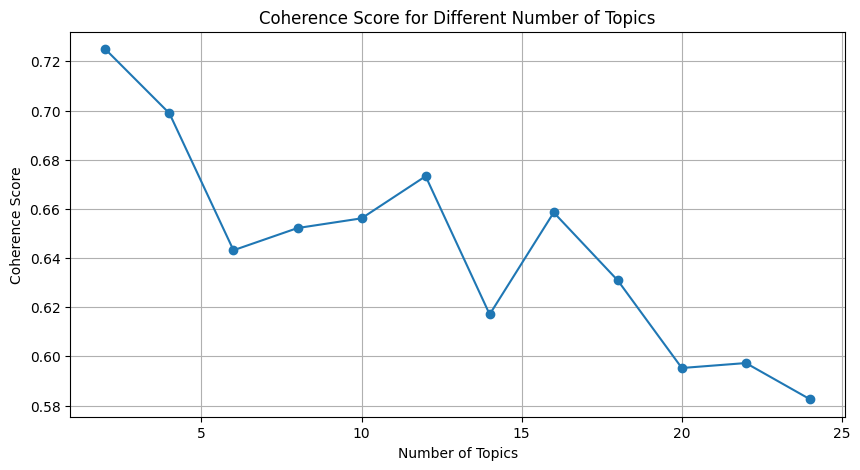

In [160]:
import matplotlib.pyplot as plt
from gensim.models import LdaModel, CoherenceModel

# Define range of topics to test
num_topics_range = list(range(2, 25, 2))  # Testing 2, 4, 6, ..., 24 topics
coherence_scores = []

for num_topics in num_topics_range:
    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5, random_state=1)
    
    # Compute Coherence Score
    coherence_model = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Store the score
    coherence_scores.append(coherence_score)
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score}")

# Plot Coherence Score
plt.figure(figsize=(10, 5))
plt.plot(num_topics_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Number of Topics")
plt.grid()
plt.show()

### Mesure du nombre de topic id√©al par la m√©thode de l'article 

D√©but du calcul des m√©triques...
Entra√Ænement pour 4 topics...
  Mini-mod√®le 1/3 pour 4 topics...
  Mini-mod√®le 2/3 pour 4 topics...
  Mini-mod√®le 3/3 pour 4 topics...
Termin√© pour 4 topics.
Entra√Ænement pour 6 topics...
  Mini-mod√®le 1/3 pour 6 topics...
  Mini-mod√®le 2/3 pour 6 topics...
  Mini-mod√®le 3/3 pour 6 topics...
Termin√© pour 6 topics.
Entra√Ænement pour 8 topics...
  Mini-mod√®le 1/3 pour 8 topics...
  Mini-mod√®le 2/3 pour 8 topics...
  Mini-mod√®le 3/3 pour 8 topics...
Termin√© pour 8 topics.
Entra√Ænement pour 10 topics...
  Mini-mod√®le 1/3 pour 10 topics...
  Mini-mod√®le 2/3 pour 10 topics...
  Mini-mod√®le 3/3 pour 10 topics...
Termin√© pour 10 topics.
Entra√Ænement pour 12 topics...
  Mini-mod√®le 1/3 pour 12 topics...
  Mini-mod√®le 2/3 pour 12 topics...
  Mini-mod√®le 3/3 pour 12 topics...
Termin√© pour 12 topics.
Entra√Ænement pour 14 topics...
  Mini-mod√®le 1/3 pour 14 topics...
  Mini-mod√®le 2/3 pour 14 topics...
  Mini-mod√®le 3/3 pour 14 topics.

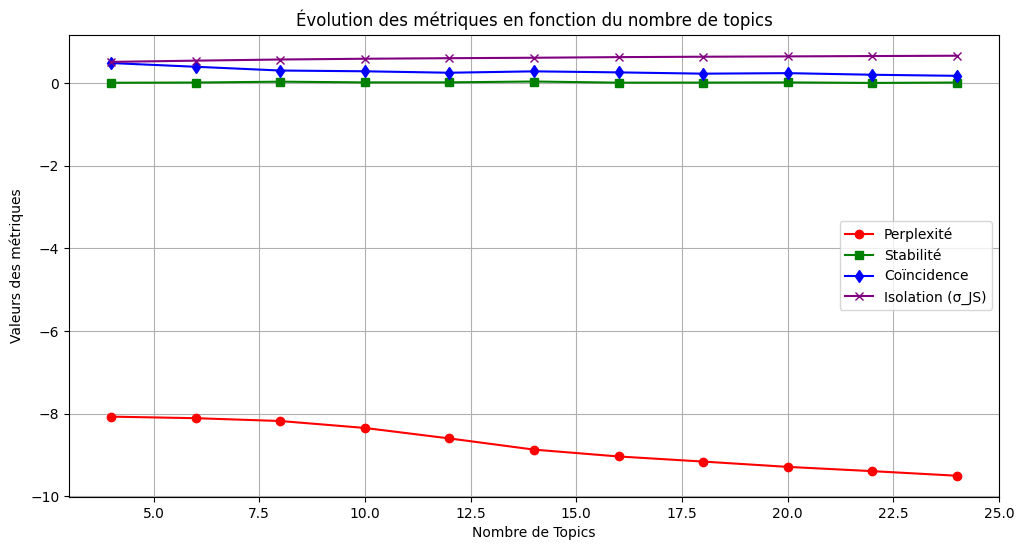


 Le nombre optimal de topics est : 4


In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from scipy.spatial.distance import jensenshannon
import random

# Param√®tres
topic_numbers = list(range(4, 26, 2))  # De 2 √† 24 topics
num_samples = 3  # R√©duction du nombre d‚Äô√©chantillons
beta = 0.5  # Taille du sous-√©chantillon
passes = 3  # Nombre de passes pour l'entra√Ænement

# Listes de stockage
stabilities = []
coincidences = []
sigma_JS = []
perplexities = []

print("D√©but du calcul des m√©triques...")

# Boucle sur les diff√©rents nombres de topics
for num_topics in topic_numbers:
    print(f"Entra√Ænement pour {num_topics} topics...")

    # Entra√Ænement du mod√®le de r√©f√©rence
    lda_ref = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, workers=4, random_state=1)

    # Perplexit√©
    perplexity = lda_ref.log_perplexity(corpus)
    perplexities.append(perplexity)

    stability_scores = []
    coincidence_scores = []
    js_distances = []

    for j in range(num_samples):
        print(f"  Mini-mod√®le {j+1}/{num_samples} pour {num_topics} topics...")

        sampled_indices = random.sample(range(len(corpus)), int(beta * len(corpus)))
        sampled_corpus = [corpus[i] for i in sampled_indices]

        lda_sample = LdaMulticore(corpus=sampled_corpus, id2word=dictionary, num_topics=num_topics, passes=passes, workers=4, random_state=1)

        # Stabilit√©
        coherence_ref = CoherenceModel(model=lda_ref, texts=docs, dictionary=dictionary, coherence='c_v').get_coherence()
        coherence_sample = CoherenceModel(model=lda_sample, texts=docs, dictionary=dictionary, coherence='c_v').get_coherence()
        stability_scores.append(abs(coherence_ref - coherence_sample))

        # Co√Øncidence
        top_words_ref = [set([word for word, _ in lda_ref.show_topic(t, topn=10)]) for t in range(num_topics)]
        top_words_sample = [set([word for word, _ in lda_sample.show_topic(t, topn=10)]) for t in range(num_topics)]
        overlap_ratios = [len(top_words_ref[t] & top_words_sample[t]) / len(top_words_ref[t] | top_words_sample[t]) for t in range(num_topics)]
        coincidence_scores.append(np.mean(overlap_ratios))

        # Isolation (œÉ_JS)
        topic_distributions = [lda_ref.get_topics()[t] for t in range(num_topics)]
        js_vals = [jensenshannon(topic_distributions[i], topic_distributions[j]) for i in range(num_topics) for j in range(i+1, num_topics)]
        js_distances.append(np.mean(js_vals))

    # Stocker les moyennes
    stabilities.append(np.mean(stability_scores))
    coincidences.append(np.mean(coincidence_scores))
    sigma_JS.append(np.mean(js_distances))

    print(f"Termin√© pour {num_topics} topics.")

# Calcul du Topic Score
topic_scores = (np.array(perplexities) * np.array(coincidences)) / (np.array(sigma_JS) * np.array(stabilities))

# Trouver le meilleur nombre de topics
best_topic_index = np.argmin(topic_scores)
best_topic_number = topic_numbers[best_topic_index]

# R√©sultats en DataFrame
df_results = pd.DataFrame({
    "Nombre de Topics": topic_numbers,
    "Perplexit√©": perplexities,
    "Stabilit√©": stabilities,
    "Co√Øncidence": coincidences,
    "Isolation (œÉ_JS)": sigma_JS,
    "Topic Score": topic_scores
})

print("\n R√©sultats des m√©triques :")
print(df_results)

# Tracer les r√©sultats
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Nombre de Topics")
ax1.set_ylabel("Valeurs des m√©triques", color="black")
ax1.plot(topic_numbers, perplexities, marker="o", color="red", label="Perplexit√©")
ax1.plot(topic_numbers, stabilities, marker="s", color="green", label="Stabilit√©")
ax1.plot(topic_numbers, coincidences, marker="d", color="blue", label="Co√Øncidence")
ax1.plot(topic_numbers, sigma_JS, marker="x", color="purple", label="Isolation (œÉ_JS)")
ax1.legend()
ax1.grid()
plt.title("√âvolution des m√©triques en fonction du nombre de topics")
plt.show()

# Afficher le meilleur nombre de topics
print(f"\n Le nombre optimal de topics est : {best_topic_number}")


## Topic Modeling avec LDA

In [162]:
%%time
from gensim.models import LdaModel

model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=15, chunksize=1500, passes=15, iterations=150, alpha='auto',
    eta='auto',random_state=1) 

CPU times: user 3min 34s, sys: 672 ms, total: 3min 35s
Wall time: 3min 36s


In [163]:
# Affiche les 30 mots les plus importants pour chaque topic

for i in range(model.num_topics):
    print(f"\n --- Topic {i+1}")
    top_words = model.show_topic(i, topn=30)
    for word, weight in top_words:
        print(f"{word:<20} {weight:.4f}")



 --- Topic 1
hollande             0.1042
fran√ßois_hollande    0.0937
prochain             0.0406
√©nergie              0.0275
pr√©parer             0.0205
journ√©e              0.0188
climat               0.0179
transition           0.0171
rassembler           0.0167
proc√©dure            0.0166
n√©gocier             0.0149
√©nerg√©tique          0.0147
confirmer            0.0140
climatique           0.0137
facile               0.0134
produire             0.0134
mauvais              0.0129
environnement        0.0121
parisien             0.0112
voiture              0.0104
cesser               0.0104
transport            0.0101
transition_√©nerg√©tique 0.0100
rendez-vous          0.0099
honn√™tement          0.0094
cour                 0.0087
entier               0.0084
marge                0.0082
d√©marche             0.0080
application          0.0077

 --- Topic 2
jeune                0.0785
euro                 0.0594
milliard             0.0423
million              0.0378
polici

In [164]:
#Afficher les 15 mots les plus pr√©sents dans chaque topics (de mani√®re plus esth√©tique)

import pandas as pd
from IPython.display import display_html

# Fonction pour afficher 3 tableaux c√¥te √† c√¥te
def display_topics_in_rows(model, topics_per_row=3, topn=15):
    topic_styles = []

    for i in range(model.num_topics):
        topic_words = model.show_topic(i, topn=topn)
        df = pd.DataFrame(topic_words, columns=["Mot", "Probabilit√©"])
        df.index += 1
        df.index.name = "Rang"

        styled_df = df.style \
            .background_gradient(cmap='Blues', subset=["Probabilit√©"]) \
            .format({"Probabilit√©": "{:.4f}"}) \
            .set_caption(f"Topic {i + 1}") \
            .set_table_styles([{
                'selector': 'caption',
                'props': [('color', '#0b5394'), ('font-size', '16px'), ('font-weight', 'bold')]
            }])

        topic_styles.append(styled_df.to_html())

    # Afficher les tableaux par groupe de 3 c√¥te √† c√¥te
    for i in range(0, len(topic_styles), topics_per_row):
        group_html = ''.join(
            f'<div style="display:inline-block; margin-right:20px; vertical-align:top">{table}</div>'
            for table in topic_styles[i:i + topics_per_row]
        )
        display_html(group_html, raw=True)

# Utilisation :
display_topics_in_rows(model, topics_per_row=3, topn=15)


Topic 1 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 hollande 
 0.1042 
 
 
 2 
 fran√ßois_hollande 
 0.0937 
 
 
 3 
 prochain 
 0.0406 
 
 
 4 
 √©nergie 
 0.0275 
 
 
 5 
 pr√©parer 
 0.0205 
 
 
 6 
 journ√©e 
 0.0188 
 
 
 7 
 climat 
 0.0179 
 
 
 8 
 transition 
 0.0171 
 
 
 9 
 rassembler 
 0.0167 
 
 
 10 
 proc√©dure 
 0.0166 
 
 
 11 
 n√©gocier 
 0.0149 
 
 
 12 
 √©nerg√©tique 
 0.0147 
 
 
 13 
 confirmer 
 0.0140 
 
 
 14 
 climatique 
 0.0137 
 
 
 15 
 facile 
 0.0134 
 
 
 
 
 
 Topic 2 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 jeune 
 0.0785 
 
 
 2 
 euro 
 0.0594 
 
 
 3 
 milliard 
 0.0423 
 
 
 4 
 million 
 0.0378 
 
 
 5 
 policier 
 0.0297 
 
 
 6 
 formation 
 0.0287 
 
 
 7 
 enseignant 
 0.0284 
 
 
 8 
 suppl√©mentaire 
 0.0230 
 
 
 9 
 budget 
 0.0215 
 
 
 10 
 baisser 
 0.0196 
 
 
 11 
 professionnel 
 0.0191 
 
 
 12 
 programme 
 0.0180 
 
 
 13 
 classe 
 0.0162 
 
 
 14 
 juge 
 0.0158 
 
 
 15 
 fili√®re 
 0.0158 
 
 
 
 
 
 Topic 3 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 pays 
 0.0382 
 
 
 2 
 important 
 0.0200 
 
 
 3 
 monde 
 0.0198 
 
 
 4 
 emploi 
 0.0183 
 
 
 5 
 etat 
 0.0151 
 
 
 6 
 grand 
 0.0144 
 
 
 7 
 vrai 
 0.0143 
 
 
 8 
 situation 
 0.0143 
 
 
 9 
 compte 
 0.0138 
 
 
 10 
 croire 
 0.0135 
 
 
 11 
 point 
 0.0130 
 
 
 12 
 cr√©er 
 0.0127 
 
 
 13 
 raison 
 0.0126 
 
 
 14 
 engager 
 0.0123 
 
 
 15 
 besoin 
 0.0120

Topic 4 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 service 
 0.0541 
 
 
 2 
 √©tat 
 0.0526 
 
 
 3 
 int√©rieur 
 0.0334 
 
 
 4 
 syst√®me 
 0.0299 
 
 
 5 
 minist√®re 
 0.0270 
 
 
 6 
 sant√© 
 0.0243 
 
 
 7 
 urgence 
 0.0228 
 
 
 8 
 m√©decin 
 0.0213 
 
 
 9 
 jean-pierre 
 0.0212 
 
 
 10 
 charge 
 0.0200 
 
 
 11 
 victime 
 0.0200 
 
 
 12 
 d√©ficit 
 0.0188 
 
 
 13 
 maire 
 0.0166 
 
 
 14 
 suffisamment 
 0.0158 
 
 
 15 
 constater 
 0.0151 
 
 
 
 
 
 Topic 5 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 gouvernement 
 0.0238 
 
 
 2 
 fran√ßois 
 0.0212 
 
 
 3 
 gauche 
 0.0210 
 
 
 4 
 donner 
 0.0168 
 
 
 5 
 droit 
 0.0166 
 
 
 6 
 d√©bat 
 0.0149 
 
 
 7 
 responsabilit√© 
 0.0143 
 
 
 8 
 justement 
 0.0132 
 
 
 9 
 agir 
 0.0129 
 
 
 10 
 souhaiter 
 0.0128 
 
 
 11 
 parler 
 0.0124 
 
 
 12 
 d√©cision 
 0.0123 
 
 
 13 
 appeler 
 0.0122 
 
 
 14 
 rappeler 
 0.0118 
 
 
 15 
 projet 
 0.0109 
 
 
 
 
 
 Topic 6 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 social 
 0.0898 
 
 
 2 
 public 
 0.0712 
 
 
 3 
 r√©forme 
 0.0546 
 
 
 4 
 n√©gociation 
 0.0317 
 
 
 5 
 discussion 
 0.0286 
 
 
 6 
 syndicat 
 0.0261 
 
 
 7 
 dialogue 
 0.0260 
 
 
 8 
 fonction 
 0.0230 
 
 
 9 
 bout 
 0.0218 
 
 
 10 
 avancer 
 0.0218 
 
 
 11 
 aide 
 0.0199 
 
 
 12 
 partenaire 
 0.0197 
 
 
 13 
 sentiment 
 0.0184 
 
 
 14 
 convaincre 
 0.0153 
 
 
 15 
 signer 
 0.0150

Topic 7 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 s√©curit√© 
 0.0575 
 
 
 2 
 national 
 0.0568 
 
 
 3 
 mieux 
 0.0439 
 
 
 4 
 trop 
 0.0280 
 
 
 5 
 √©lection 
 0.0268 
 
 
 6 
 expliquer 
 0.0260 
 
 
 7 
 guerre 
 0.0234 
 
 
 8 
 gagner 
 0.0207 
 
 
 9 
 prot√©ger 
 0.0193 
 
 
 10 
 violence 
 0.0191 
 
 
 11 
 assembl√©e 
 0.0188 
 
 
 12 
 manifestation 
 0.0186 
 
 
 13 
 porte 
 0.0175 
 
 
 14 
 tour 
 0.0175 
 
 
 15 
 loin 
 0.0150 
 
 
 
 
 
 Topic 8 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 terrorisme 
 0.0377 
 
 
 2 
 terroriste 
 0.0368 
 
 
 3 
 lutte 
 0.0272 
 
 
 4 
 risque 
 0.0268 
 
 
 5 
 r√©gion 
 0.0232 
 
 
 6 
 coup 
 0.0229 
 
 
 7 
 menace 
 0.0196 
 
 
 8 
 r√®gle 
 0.0195 
 
 
 9 
 utiliser 
 0.0182 
 
 
 10 
 √©quipe 
 0.0179 
 
 
 11 
 cons√©quence 
 0.0177 
 
 
 12 
 britannique 
 0.0153 
 
 
 13 
 peur 
 0.0147 
 
 
 14 
 capable 
 0.0143 
 
 
 15 
 propre 
 0.0143 
 
 
 
 
 
 Topic 9 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 instant 
 0.0518 
 
 
 2 
 nicolas 
 0.0452 
 
 
 3 
 sarkozy 
 0.0438 
 
 
 4 
 payer 
 0.0434 
 
 
 5 
 imp√¥t 
 0.0405 
 
 
 6 
 nicolas_sarkozy 
 0.0371 
 
 
 7 
 dossier 
 0.0304 
 
 
 8 
 suite 
 0.0292 
 
 
 9 
 commentaire 
 0.0281 
 
 
 10 
 pr√™t 
 0.0238 
 
 
 11 
 sondage 
 0.0229 
 
 
 12 
 rentr√©e 
 0.0228 
 
 
 13 
 revenu 
 0.0209 
 
 
 14 
 interroger 
 0.0209 
 
 
 15 
 forc√©ment 
 0.0203

Topic 10 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 mois 
 0.0782 
 
 
 2 
 europe 
 0.0768 
 
 
 3 
 europ√©en 
 0.0707 
 
 
 4 
 affaire 
 0.0334 
 
 
 5 
 territoire 
 0.0291 
 
 
 6 
 international 
 0.0277 
 
 
 7 
 √©tranger 
 0.0244 
 
 
 8 
 union 
 0.0224 
 
 
 9 
 prix 
 0.0220 
 
 
 10 
 march√© 
 0.0217 
 
 
 11 
 allemagne 
 0.0216 
 
 
 12 
 construire 
 0.0166 
 
 
 13 
 union_europ√©en 
 0.0153 
 
 
 14 
 agriculture 
 0.0149 
 
 
 15 
 industriel 
 0.0147 
 
 
 
 
 
 Topic 11 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 pr√©sident 
 0.1222 
 
 
 2 
 r√©publique 
 0.0944 
 
 
 3 
 pr√©sident_r√©publique 
 0.0709 
 
 
 4 
 campagne 
 0.0351 
 
 
 5 
 recevoir 
 0.0274 
 
 
 6 
 engagement 
 0.0243 
 
 
 7 
 enqu√™te 
 0.0241 
 
 
 8 
 r√¥le 
 0.0233 
 
 
 9 
 chef 
 0.0205 
 
 
 10 
 pr√©sidentiel 
 0.0148 
 
 
 11 
 combat 
 0.0148 
 
 
 12 
 assumer 
 0.0147 
 
 
 13 
 jouer 
 0.0137 
 
 
 14 
 discours 
 0.0128 
 
 
 15 
 initiative 
 0.0127 
 
 
 
 
 
 Topic 12 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 entendre 
 0.0640 
 
 
 2 
 candidat 
 0.0574 
 
 
 3 
 conna√Ætre 
 0.0393 
 
 
 4 
 porter 
 0.0310 
 
 
 5 
 justice 
 0.0274 
 
 
 6 
 cause 
 0.0247 
 
 
 7 
 organisation 
 0.0211 
 
 
 8 
 histoire 
 0.0198 
 
 
 9 
 autorit√© 
 0.0169 
 
 
 10 
 remettre 
 0.0165 
 
 
 11 
 libert√© 
 0.0162 
 
 
 12 
 aimer 
 0.0159 
 
 
 13 
 envie 
 0.0157 
 
 
 14 
 etc. 
 0.0154 
 
 
 15 
 forme 
 0.0146

Topic 13 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 travail 
 0.0967 
 
 
 2 
 entreprise 
 0.0831 
 
 
 3 
 mesure 
 0.0553 
 
 
 4 
 travailler 
 0.0520 
 
 
 5 
 conseil 
 0.0360 
 
 
 6 
 plan 
 0.0308 
 
 
 7 
 salari√© 
 0.0289 
 
 
 8 
 pr√©senter 
 0.0220 
 
 
 9 
 activit√© 
 0.0218 
 
 
 10 
 dispositif 
 0.0165 
 
 
 11 
 avis 
 0.0145 
 
 
 12 
 relever 
 0.0145 
 
 
 13 
 secteur 
 0.0144 
 
 
 14 
 contrat 
 0.0122 
 
 
 15 
 article 
 0.0119 
 
 
 
 
 
 Topic 14 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 accord 
 0.0974 
 
 
 2 
 primaire 
 0.0520 
 
 
 3 
 attendre 
 0.0502 
 
 
 4 
 paris 
 0.0425 
 
 
 5 
 √©cole 
 0.0312 
 
 
 6 
 enfant 
 0.0300 
 
 
 7 
 r√©sultat 
 0.0293 
 
 
 8 
 bilan 
 0.0233 
 
 
 9 
 scolaire 
 0.0224 
 
 
 10 
 √©l√®ve 
 0.0213 
 
 
 11 
 organiser 
 0.0206 
 
 
 12 
 poste 
 0.0202 
 
 
 13 
 belkacem 
 0.0171 
 
 
 14 
 vallaud 
 0.0169 
 
 
 15 
 accueil 
 0.0166 
 
 
 
 
 
 Topic 15 
 
 
   
 Mot 
 Probabilit√© 
 
 
 Rang 
   
   
 
 
 
 
 1 
 probl√®me 
 0.0507 
 
 
 2 
 moyen 
 0.0402 
 
 
 3 
 proposer 
 0.0304 
 
 
 4 
 syrie 
 0.0252 
 
 
 5 
 famille 
 0.0239 
 
 
 6 
 logement 
 0.0226 
 
 
 7 
 police 
 0.0221 
 
 
 8 
 ville 
 0.0209 
 
 
 9 
 contr√¥le 
 0.0183 
 
 
 10 
 pr√©sent 
 0.0181 
 
 
 11 
 centre 
 0.0178 
 
 
 12 
 zone 
 0.0171 
 
 
 13 
 pose 
 0.0169 
 
 
 14 
 accueillir 
 0.0163 
 
 
 15 
 assurer 
 0.0160

### Appliquer la LDA √† tout mon corpus

Pour chaque prise de parole on ajoute le pourcentage de chaque topic dans des colonnes allant de Topic 1 √† Topic 15

In [165]:
import numpy as np
import pandas as pd
from gensim.matutils import sparse2full

# √âtape 1 : Calculer la distribution de topics
topic_dists = [sparse2full(model[doc], model.num_topics) for doc in corpus]
topic_cols = [f"Topic_{i+1}" for i in range(model.num_topics)]
topic_df = pd.DataFrame(topic_dists, columns=topic_cols)

# √âtape 2 : Fusionner avec le DataFrame original
df_lda = pd.concat([df_3_gouv.reset_index(drop=True), topic_df], axis=1)

# √âtape 3 : Identifier les lignes vides
lines_empty = [len(doc) == 0 for doc in docs]
df_lda["ligne_vide"] = lines_empty

# √âtape 4 : Remplacer les distributions par NaN si la ligne est vide
df_lda.loc[df_lda["ligne_vide"], topic_cols] = np.nan

In [166]:
df_lda.columns

Index(['Unnamed: 0', 'web-scraper-order', 'web-scraper-start-url', 'link',
       'link-href', 'Texte', 'Date', 'Media', 'intervenants_metiers',
       'interviewer_metier', 'Gouvernement', 'Mandat', 'Media_clean',
       'parti_ministre', 'party_id', 'year', 'score_ministre', 'score_media',
       'Qui_parle', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5',
       'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10', 'Topic_11',
       'Topic_12', 'Topic_13', 'Topic_14', 'Topic_15', 'ligne_vide'],
      dtype='object')

### Mesure du pourcentage moyen de topic pour chaque prise de parole (comparatif entre gouvernements)

In [168]:
import pandas as pd

# Calcul des moyennes par pr√©sident
sarkozy_mean = df_lda[df_lda["Mandat"] == "Sarkozy"][topic_cols].mean()
hollande_mean = df_lda[df_lda["Mandat"] == "Hollande"][topic_cols].mean()

# Cr√©er un DataFrame combin√©
mean_df = pd.DataFrame({
    "Sarkozy": sarkozy_mean,
    "Hollande": hollande_mean
}).T

# D√©finir une fonction de coloration personnalis√©e
def highlight_president(row):
    color = "#d9ead3" if row.name == "Sarkozy" else "#c9daf8"
    return [f'background-color: {color}'] * len(row)

# Appliquer le style
styled = mean_df.style \
    .apply(highlight_president, axis=1) \
    .format("{:.4f}") \
    .set_caption("Moyennes des pourcentages de topics par prise de parole par pr√©sident") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', '#0b5394'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

# Afficher
styled

In [169]:
### Meme tableau avec une diff√©rente pr√©sentation (plus classique)

import pandas as pd

# Calcul des moyennes par pr√©sident
sarkozy_mean = df_lda[df_lda["Mandat"] == "Sarkozy"][topic_cols].mean()
hollande_mean = df_lda[df_lda["Mandat"] == "Hollande"][topic_cols].mean()

# Cr√©er un DataFrame avec les topics en ligne et les pr√©sidents en colonnes
mean_df = pd.DataFrame({
    "Topic": topic_cols,
    "Sarkozy": sarkozy_mean.values,
    "Hollande": hollande_mean.values
})

# R√©organiser proprement
mean_df = mean_df.set_index("Topic")

# Afficher proprement avec arrondi
mean_df = mean_df.round(4)
display(mean_df)

Sarkozy  Hollande
Topic                      
Topic_1    0.0348    0.0363
Topic_2    0.0446    0.0447
Topic_3    0.1917    0.1917
Topic_4    0.0460    0.0446
Topic_5    0.2108    0.2139
Topic_6    0.0455    0.0450
Topic_7    0.0513    0.0517
Topic_8    0.0449    0.0460
Topic_9    0.0327    0.0309
Topic_10   0.0497    0.0482
Topic_11   0.0491    0.0476
Topic_12   0.0532    0.0537
Topic_13   0.0530    0.0516
Topic_14   0.0404    0.0408
Topic_15   0.0523    0.0531

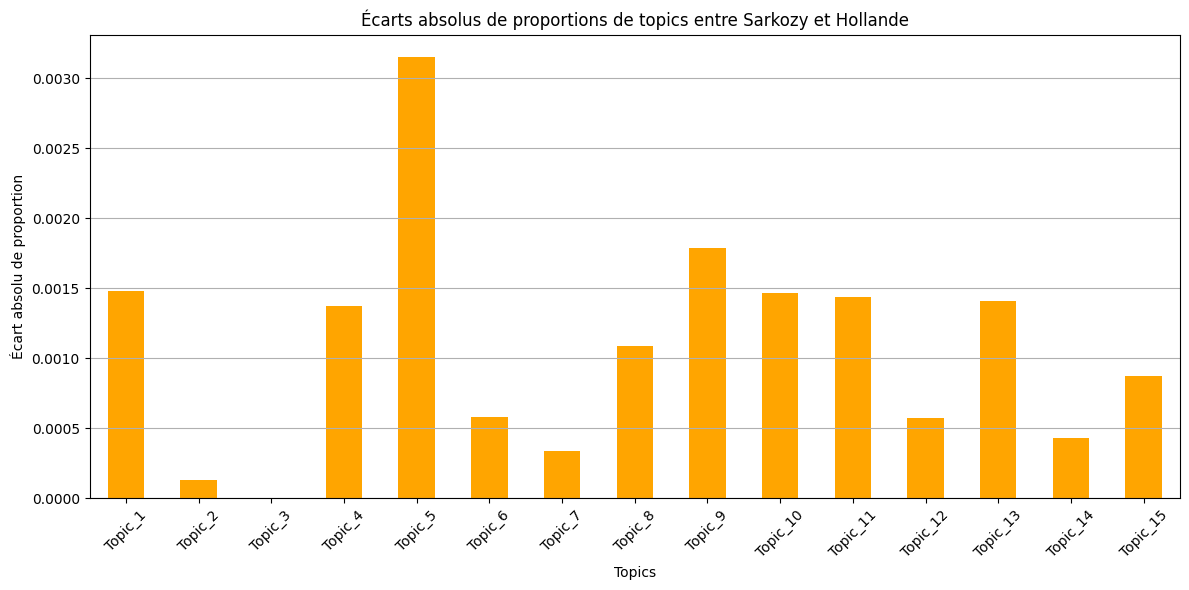

In [170]:
# Diagramme √† barres des √©carts absolus de proportion de topics abord√©s dans les sous corpus d'Hollande et de Sarkozy

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que ton DataFrame principal s'appelle df_lda
# Filtrer les lignes par mandat
sarkozy_df = df_lda[df_lda["Mandat"] == "Sarkozy"]
hollande_df = df_lda[df_lda["Mandat"] == "Hollande"]

# S√©lection des colonnes de topics
topic_cols = [col for col in df_lda.columns if col.startswith("Topic_")]

# Moyennes par topic
mean_df = pd.DataFrame({
    "Sarkozy": sarkozy_df[topic_cols].mean(),
    "Hollande": hollande_df[topic_cols].mean()
}).T

# Calcul des √©carts absolus
differences = (mean_df.loc["Hollande"] - mean_df.loc["Sarkozy"]).abs()

# Visualisation
plt.figure(figsize=(12, 6))
differences.plot(kind='bar', color='orange')
plt.title("√âcarts absolus de proportions de topics entre Sarkozy et Hollande")
plt.ylabel("√âcart absolu de proportion")
plt.xlabel("Topics")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


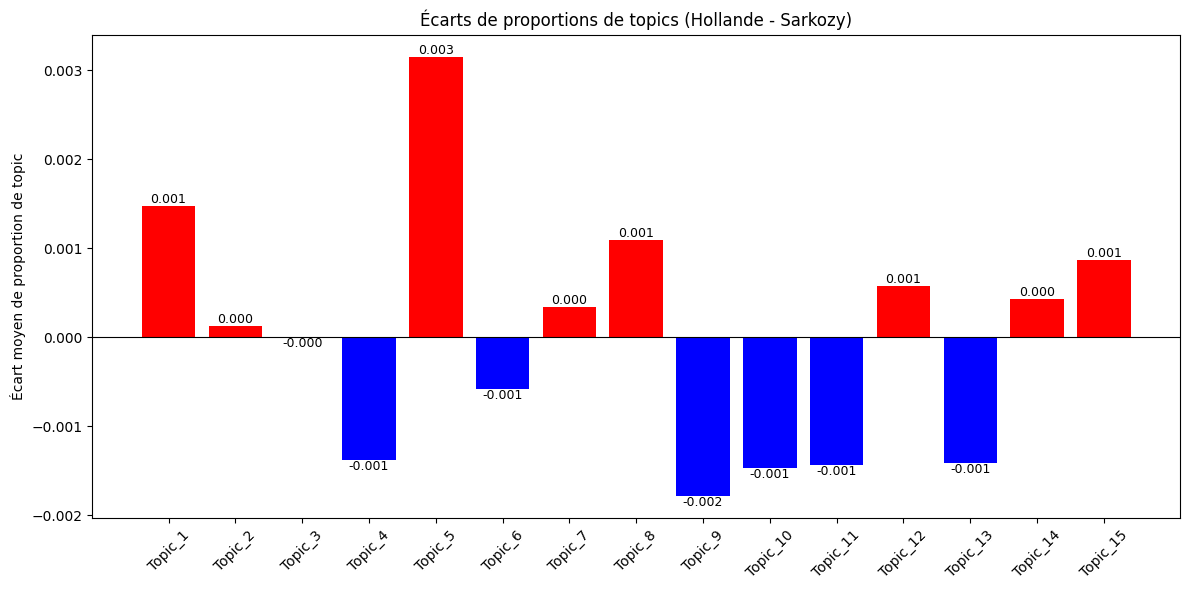

In [171]:
# Diagramme √† barres des √©carts (non absolus cette fois) de proportion de topics abord√©s dans les sous corpus d'Hollande et de Sarkozy

import pandas as pd
import matplotlib.pyplot as plt


# Calcul des diff√©rences Hollande - Sarkozy
diffs = mean_df.loc["Hollande"] - mean_df.loc["Sarkozy"]

# D√©finition des couleurs en fonction du signe de la diff√©rence
colors = ['red' if val > 0 else 'blue' for val in diffs]

# Cr√©ation du graphique
plt.figure(figsize=(12, 6))
bars = plt.bar(diffs.index, diffs.values, color=colors)

# Lignes de base et titres
plt.axhline(0, color='black', linewidth=0.8)
plt.title("√âcarts de proportions de topics (Hollande - Sarkozy)")
plt.ylabel("√âcart moyen de proportion de topic")
plt.xticks(rotation=45)

# Ajout des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval:.3f}',
             ha='center',
             va='bottom' if yval > 0 else 'top',
             fontsize=9)

plt.tight_layout()
plt.show()

/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/2893378385.py:11: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_lda["Topic_principal"] = df_lda[topic_cols].idxmax(axis=1)


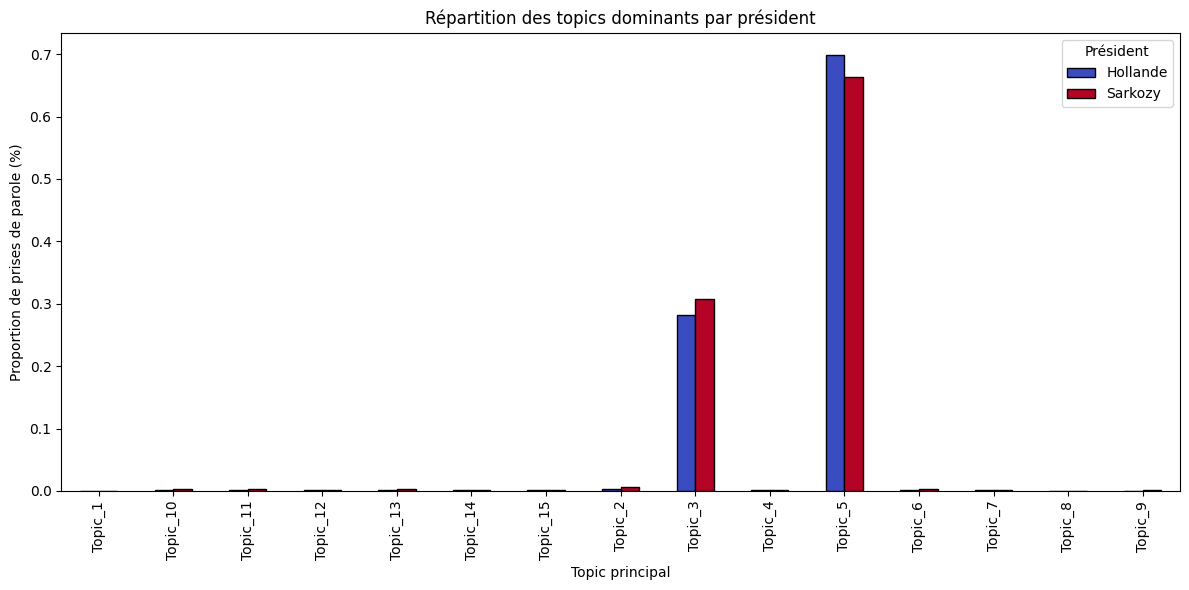

In [172]:
# Identifier pour chaque prise de parole le topic principal (plus grande proportion)
# Puis, mesurer le pourcentage d'apparition de chaque topic dominant pour les sous corpus Hollande et le sous corpus Sarkozy
# Enfin, r√©aliser un diagramme √† barres de pourcentage d'apparition des topics dominants sous les deux sous corpus

import pandas as pd

# √âtape 1 : S√©lectionne les colonnes des topics contenant des donn√©es num√©riques
topic_cols = [col for col in df_lda.columns if col.startswith("Topic_") and pd.api.types.is_numeric_dtype(df_lda[col])]

# √âtape 2 : Identifier le topic dominant (valeur la plus haute) pour chaque ligne
df_lda["Topic_principal"] = df_lda[topic_cols].idxmax(axis=1)

# √âtape 3 : Compter le nombre de lignes par topic et par pr√©sident (Mandat)
count_by_topic_mandat = df_lda.groupby(["Mandat", "Topic_principal"]).size().unstack(fill_value=0)

# √âtape 4 : Convertir en pourcentages par pr√©sident (normalisation par ligne)
percent_by_topic_mandat = count_by_topic_mandat.div(count_by_topic_mandat.sum(axis=1), axis=0)

# √âtape 5 : Afficher le r√©sultat
import matplotlib.pyplot as plt

percent_by_topic_mandat.T.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor='black')
plt.title("R√©partition des topics dominants par pr√©sident")
plt.ylabel("Proportion de prises de parole (%)")
plt.xlabel("Topic principal")
plt.legend(title="Pr√©sident")
plt.tight_layout()
plt.show()

/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/2068306381.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discriminant_df.reset_index(), x='Topic_principal', y='Diff√©rence (H - S)', palette='coolwarm')


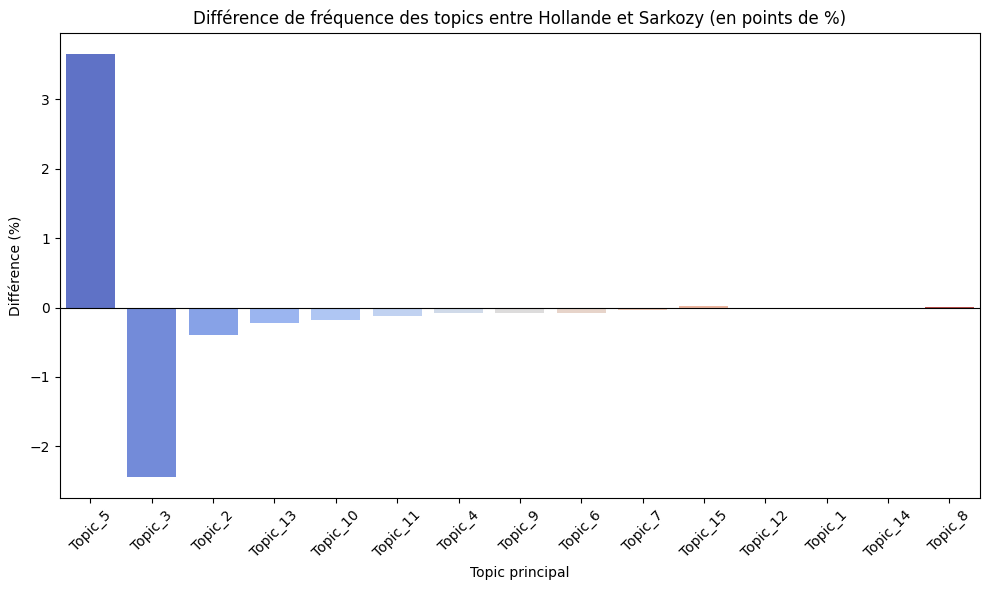

In [173]:
# Comparaison de la r√©partition des topics dominants dans les discours de Hollande et Sarkozy en calculant pour chaque topic la diff√©rence de fr√©quence (en pourcentage) entre les deux pr√©sidents
# Affichage de ces diff√©rences sous forme de graphique en barres pour visualiser quels topics distinguent le plus leurs prises de parole


import pandas as pd

# √âtape 1 : Compter le nombre de lignes par topic et par mandat
topic_counts = df_lda.groupby(['Mandat', 'Topic_principal']).size().unstack(fill_value=0)

# √âtape 2 : Convertir en pourcentage par mandat (normalisation ligne √† 100%)
topic_percentages = topic_counts.div(topic_counts.sum(axis=1), axis=0) * 100

# √âtape 3 : Calculer la diff√©rence de pourcentage Hollande - Sarkozy
topic_diff = topic_percentages.loc['Hollande'] - topic_percentages.loc['Sarkozy']

# √âtape 4 : Cr√©er un tableau final
discriminant_df = pd.DataFrame({
    'Pourcentage Hollande': topic_percentages.loc['Hollande'],
    'Pourcentage Sarkozy': topic_percentages.loc['Sarkozy'],
    'Diff√©rence (H - S)': topic_diff
}).sort_values(by='Diff√©rence (H - S)', key=abs, ascending=False)

# Affichage
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=discriminant_df.reset_index(), x='Topic_principal', y='Diff√©rence (H - S)', palette='coolwarm')
plt.title('Diff√©rence de fr√©quence des topics entre Hollande et Sarkozy (en points de %)')
plt.ylabel('Diff√©rence (%)')
plt.xlabel('Topic principal')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [174]:
print("Index des mandats :", topic_counts.index.tolist())

Index des mandats : ['Hollande', 'Sarkozy']


In [175]:
import pandas as pd

# √âtape 1 : Calcul des fr√©quences
topic_counts = df_lda.groupby("Mandat")["Topic_principal"].value_counts(normalize=True).unstack(fill_value=0)

# S'assurer que tous les topics sont pr√©sents pour les deux mandats
topics = sorted(topic_counts.columns)
mandats = ["Hollande", "Sarkozy"]
topic_counts = topic_counts.reindex(index=mandats, columns=topics, fill_value=0)

# Calcul du ratio Hollande/Sarkozy (√©vite division par z√©ro)
ratios = (topic_counts.loc["Hollande", topics] / topic_counts.loc["Sarkozy", topics].replace(0, 1e-9)) * 100

# Format du r√©sultat
comparatif_df = pd.DataFrame({
    "Hollande (%)": topic_counts.loc["Hollande", topics] * 100,
    "Sarkozy (%)": topic_counts.loc["Sarkozy", topics] * 100,
    "Ratio Hollande/Sarkozy (%)": ratios
}).round(2)

comparatif_df = comparatif_df.sort_values(by="Ratio Hollande/Sarkozy (%)", ascending=False)
print(comparatif_df)


                 Hollande (%)  Sarkozy (%)  Ratio Hollande/Sarkozy (%)
Topic_principal                                                       
Topic_15                 0.20         0.17                      116.89
Topic_5                 69.91        66.26                      105.52
Topic_8                  0.07         0.07                      105.13
Topic_14                 0.17         0.17                       97.64
Topic_3                 28.24        30.69                       92.03
Topic_12                 0.11         0.13                       83.56
Topic_1                  0.06         0.08                       81.45
Topic_7                  0.11         0.14                       74.56
Topic_6                  0.17         0.25                       68.61
Topic_4                  0.14         0.22                       61.54
Topic_11                 0.18         0.30                       59.26
Topic_10                 0.18         0.36                       49.86
Topic_

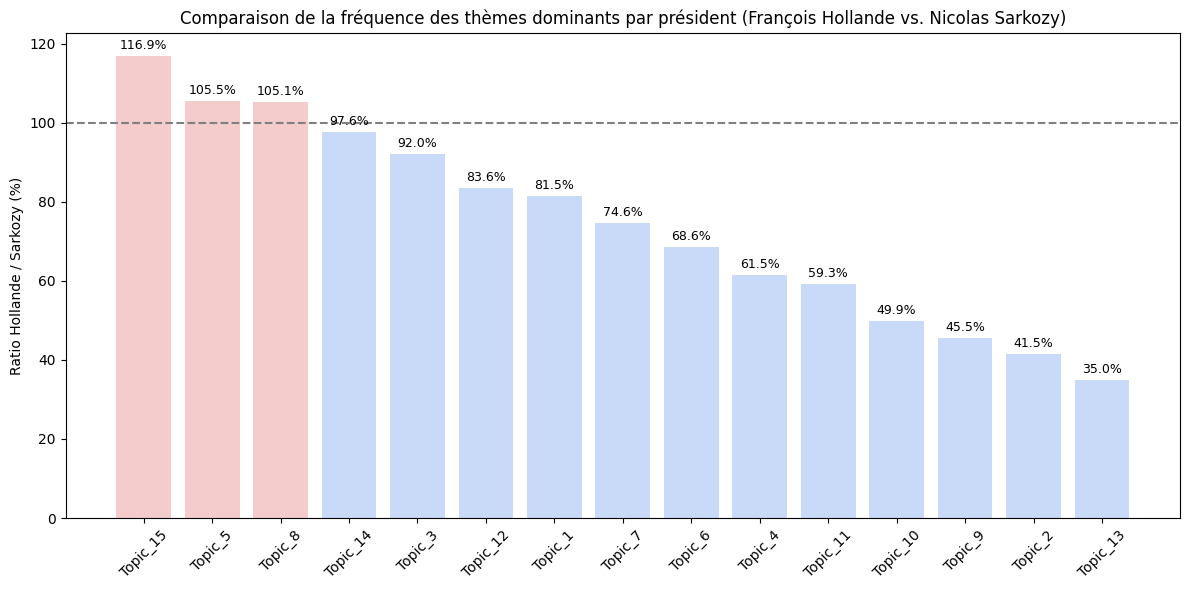

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# √âtape 1 : Compter les occurrences de chaque topic principal par gouvernement
counts = df_lda.groupby(['Mandat', 'Topic_principal']).size().unstack(fill_value=0)

# S'assurer que tous les topics sont pr√©sents pour les deux pr√©sidents
topics = sorted(set(counts.columns))
counts = counts.reindex(index=['Hollande', 'Sarkozy'], columns=topics, fill_value=0)

# √âtape 2 : Calculer la proportion (fr√©quence) par gouvernement
proportions = counts.div(counts.sum(axis=1), axis=0)

# √âtape 3 : Calculer le ratio Hollande / Sarkozy en %
ratio = (proportions.loc['Hollande'] / proportions.loc['Sarkozy'].replace(0, 1e-9)) * 100

# √âtape 4 : Mise en forme
ratio = ratio.sort_values(ascending=False)

# Couleurs pastel : vert clair et rouge clair
colors = ['#f4cccc' if val > 100 else '#c9daf8' for val in ratio]

# √âtape 5 : Affichage du graphique avec annotations
plt.figure(figsize=(12, 6))
bars = plt.bar(ratio.index, ratio.values, color=colors)
plt.axhline(100, color='gray', linestyle='--')
plt.ylabel('Ratio Hollande / Sarkozy (%)')
plt.title('Comparaison de la fr√©quence des th√®mes dominants par pr√©sident (Fran√ßois Hollande vs. Nicolas Sarkozy)')
plt.xticks(rotation=45)

# Ajout des pourcentages au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

### Qui oriente les th√©matiques abord√©es dans les interviews ?

### Calcul de la JS divergence moyenne Journaliste --> Ministre et Ministre --> Journaliste

In [177]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon

# Colonnes topics
topic_cols = [f"Topic_{i}" for i in range(1, 16)]
df_lda[topic_cols] = df_lda[topic_cols].astype(float)

# Listes de distances
distances_journaliste_to_ministre = []
distances_ministre_to_journaliste = []

# Parcours des lignes
for i in range(len(df_lda) - 1):
    row_current = df_lda.iloc[i]
    row_next = df_lda.iloc[i + 1]

    # V√©rifier qu‚Äôon est dans la m√™me interview
    if row_current["link-href"] != row_next["link-href"]:
        continue

    # V√©rifier l‚Äôabsence de NaNs
    if row_current[topic_cols].isna().any() or row_next[topic_cols].isna().any():
        continue

    # Extraire et convertir
    p = row_current[topic_cols].values.astype(np.float64)
    q = row_next[topic_cols].values.astype(np.float64)

    # V√©rifier qu‚Äôil ne s‚Äôagit pas de vecteurs nuls
    if p.sum() == 0 or q.sum() == 0:
        continue

    # Normaliser en distribution de probabilit√©
    p_norm = p / p.sum()
    q_norm = q / q.sum()

    # Calcul de la divergence si les vecteurs sont valides
    if not (np.any(np.isnan(p_norm)) or np.any(np.isnan(q_norm))):
        if row_current["Qui_parle"] == "Journaliste" and row_next["Qui_parle"] == "Ministre":
            js = jensenshannon(p_norm, q_norm)
            distances_journaliste_to_ministre.append(js)

        elif row_current["Qui_parle"] == "Ministre" and row_next["Qui_parle"] == "Journaliste":
            js = jensenshannon(p_norm, q_norm)
            distances_ministre_to_journaliste.append(js)


# Filtrer les NaN √©ventuels dans les listes
distances_journaliste_to_ministre = [v for v in distances_journaliste_to_ministre if not np.isnan(v)]
distances_ministre_to_journaliste = [v for v in distances_ministre_to_journaliste if not np.isnan(v)]

# R√©sultats
print("Moyenne JS divergence (Journaliste ‚Üí Ministre) :", 
      round(np.mean(distances_journaliste_to_ministre), 4))

print("Moyenne JS divergence (Ministre ‚Üí Journaliste) :", 
      round(np.mean(distances_ministre_to_journaliste), 4))


/Users/chloe/miniconda3/envs/spacy/lib/python3.10/site-packages/scipy/spatial/distance.py:1271: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


üìä Moyenne JS divergence (Journaliste ‚Üí Ministre) : 0.1531
üìä Moyenne JS divergence (Ministre ‚Üí Journaliste) : 0.1566


### JS divergence Journaliste --> Ministre et Ministre --> Journaliste moyenne par m√©dia

In [178]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon

# Colonnes des topics
topic_cols = [f"Topic_{i}" for i in range(1, 16)]
df_lda[topic_cols] = df_lda[topic_cols].astype(float)

# Stockage des r√©sultats
results = []

for media in df_lda["Media_clean"].dropna().unique():
    df_media = df_lda[df_lda["Media_clean"] == media]

    for mandat in df_media["Mandat"].dropna().unique():
        df_mandat = df_media[df_media["Mandat"] == mandat].reset_index(drop=True)

        # Listes de distances pour ce m√©dia et ce mandat
        distances_journaliste_to_ministre = []
        distances_ministre_to_journaliste = []

        for i in range(len(df_mandat) - 1):
            row_current = df_mandat.iloc[i]
            row_next = df_mandat.iloc[i + 1]

            # M√™me interview
            if row_current["link-href"] != row_next["link-href"]:
                continue

            # Pas de NaN
            if row_current[topic_cols].isna().any() or row_next[topic_cols].isna().any():
                continue

            # Vecteurs normalis√©s
            p = row_current[topic_cols].values.astype(np.float64)
            q = row_next[topic_cols].values.astype(np.float64)

            if p.sum() == 0 or q.sum() == 0:
                continue

            p_norm = p / p.sum()
            q_norm = q / q.sum()

            if np.any(np.isnan(p_norm)) or np.any(np.isnan(q_norm)):
                continue

            # Calcul des distances JS avec patch pour √©viter les warnings
            if row_current["Qui_parle"] == "Journaliste" and row_next["Qui_parle"] == "Ministre":
                js = jensenshannon(p_norm, q_norm)
                js = np.clip(js, a_min=0.0, a_max=None)  # Patch pour √©viter les warnings
                distances_journaliste_to_ministre.append(js)

            elif row_current["Qui_parle"] == "Ministre" and row_next["Qui_parle"] == "Journaliste":
                js = jensenshannon(p_norm, q_norm)
                js = np.clip(js, a_min=0.0, a_max=None)  # Patch pour √©viter les warnings
                distances_ministre_to_journaliste.append(js)

        # Ajouter r√©sultats
        results.append({
            "Media_clean": media,
            "Mandat": mandat,
            "JS_Journaliste_to_Ministre": np.mean([v for v in distances_journaliste_to_ministre if not np.isnan(v)]) if distances_journaliste_to_ministre else np.nan,
            "JS_Ministre_to_Journaliste": np.mean([v for v in distances_ministre_to_journaliste if not np.isnan(v)]) if distances_ministre_to_journaliste else np.nan
        })

# R√©sultats dans un DataFrame
df_js_results = pd.DataFrame(results)

df_js_results


/Users/chloe/miniconda3/envs/spacy/lib/python3.10/site-packages/scipy/spatial/distance.py:1271: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


Media_clean    Mandat  JS_Journaliste_to_Ministre  \
0      France Inter   Sarkozy                    0.162523   
1      France Inter  Hollande                    0.157048   
2          France 2   Sarkozy                    0.167389   
3          France 2  Hollande                    0.159242   
4       France Info   Sarkozy                    0.174851   
5       France Info  Hollande                    0.149742   
6               RTL   Sarkozy                    0.149164   
7               RTL  Hollande                    0.145424   
8               RMC   Sarkozy                    0.172852   
9               RMC  Hollande                    0.154147   
10              LCI   Sarkozy                    0.169840   
11              LCI  Hollande                    0.152580   
12         Europe 1   Sarkozy                    0.149708   
13         Europe 1  Hollande                    0.146109   
14     CNews/I-T√©l√©   Sarkozy                    0.150471   
15     CNews/I-T√©l√©  Hollande                    0.153358   
16  Radio Classique   Sarkozy                    0.165661   
17  Radio Classique  Hollande                    0.155706   
18           Canal+   Sarkozy                    0.157294   
19           Canal+  Hollande                    0.143670   
20         France 3   Sarkozy                    0.160274   
21         France 3  Hollande                    0.151508   
22              TF1   Sarkozy                    0.171749   
23              TF1  Hollande                    0.133294   
24           BFM TV   Sarkozy                    0.137388   
25           BFM TV  Hollande                    0.131543   
26         France 5   Sarkozy                    0.151568   
27         France 5  Hollande                    0.128113   
28   France Culture   Sarkozy                    0.166785   
29   France Culture  Hollande                    0.159254   
30       LCP/PubSen  Hollande                    0.155550   

    JS_Ministre_to_Journaliste  
0                     0.168152  
1                     0.160271  
2                     0.172467  
3                     0.160114  
4                     0.178177  
5                     0.150567  
6                     0.153695  
7                     0.146436  
8                     0.173866  
9                     0.156259  
10                    0.178873  
11                    0.154920  
12                    0.156190  
13                    0.149213  
14                    0.153669  
15                    0.157369  
16                    0.173255  
17                    0.161931  
18                    0.155903  
19                    0.144287  
20                    0.162932  
21                    0.150338  
22                    0.177248  
23                    0.142294  
24                    0.131291  
25                    0.134538  
26                    0.142326  
27                    0.122883  
28                    0.171628  
29                    0.164809  
30                    0.160933

### Rajout d'une m√©trique pour mesurer la diff√©rence de changement de sujets entre ministres et journalistes

In [179]:
# Calcul de la m√©trique : √† quel point les journalistes orientent la conversation
df_js_results['Controle_Journaliste'] = (
    df_js_results['JS_Ministre_to_Journaliste'] - df_js_results['JS_Journaliste_to_Ministre']
)

# Tri d√©croissant pour voir les cas o√π l'√©cart est le plus grand
df_js_results_sorted = df_js_results.sort_values(by='Controle_Journaliste', ascending=False)

# Affichage du tableau
import pandas as pd
pd.set_option('display.max_rows', None)  # pour voir tous les r√©sultats si besoin
df_js_results_sorted


Media_clean    Mandat  JS_Journaliste_to_Ministre  \
10              LCI   Sarkozy                    0.169840   
23              TF1  Hollande                    0.133294   
16  Radio Classique   Sarkozy                    0.165661   
12         Europe 1   Sarkozy                    0.149708   
17  Radio Classique  Hollande                    0.155706   
0      France Inter   Sarkozy                    0.162523   
29   France Culture  Hollande                    0.159254   
22              TF1   Sarkozy                    0.171749   
30       LCP/PubSen  Hollande                    0.155550   
2          France 2   Sarkozy                    0.167389   
28   France Culture   Sarkozy                    0.166785   
6               RTL   Sarkozy                    0.149164   
15     CNews/I-T√©l√©  Hollande                    0.153358   
4       France Info   Sarkozy                    0.174851   
1      France Inter  Hollande                    0.157048   
14     CNews/I-T√©l√©   Sarkozy                    0.150471   
13         Europe 1  Hollande                    0.146109   
25           BFM TV  Hollande                    0.131543   
20         France 3   Sarkozy                    0.160274   
11              LCI  Hollande                    0.152580   
9               RMC  Hollande                    0.154147   
8               RMC   Sarkozy                    0.172852   
7               RTL  Hollande                    0.145424   
3          France 2  Hollande                    0.159242   
5       France Info  Hollande                    0.149742   
19           Canal+  Hollande                    0.143670   
21         France 3  Hollande                    0.151508   
18           Canal+   Sarkozy                    0.157294   
27         France 5  Hollande                    0.128113   
24           BFM TV   Sarkozy                    0.137388   
26         France 5   Sarkozy                    0.151568   

    JS_Ministre_to_Journaliste  Controle_Journaliste  
10                    0.178873              0.009033  
23                    0.142294              0.009000  
16                    0.173255              0.007594  
12                    0.156190              0.006482  
17                    0.161931              0.006225  
0                     0.168152              0.005629  
29                    0.164809              0.005556  
22                    0.177248              0.005499  
30                    0.160933              0.005382  
2                     0.172467              0.005078  
28                    0.171628              0.004843  
6                     0.153695              0.004532  
15                    0.157369              0.004011  
4                     0.178177              0.003326  
1                     0.160271              0.003223  
14                    0.153669              0.003198  
13                    0.149213              0.003104  
25                    0.134538              0.002995  
20                    0.162932              0.002658  
11                    0.154920              0.002340  
9                     0.156259              0.002112  
8                     0.173866              0.001014  
7                     0.146436              0.001012  
3                     0.160114              0.000872  
5                     0.150567              0.000825  
19                    0.144287              0.000617  
21                    0.150338             -0.001171  
18                    0.155903             -0.001391  
27                    0.122883             -0.005230  
24                    0.131291             -0.006096  
26                    0.142326             -0.009242

### Diagramme √† barres du controle journalistique par gouvernement par m√©dia

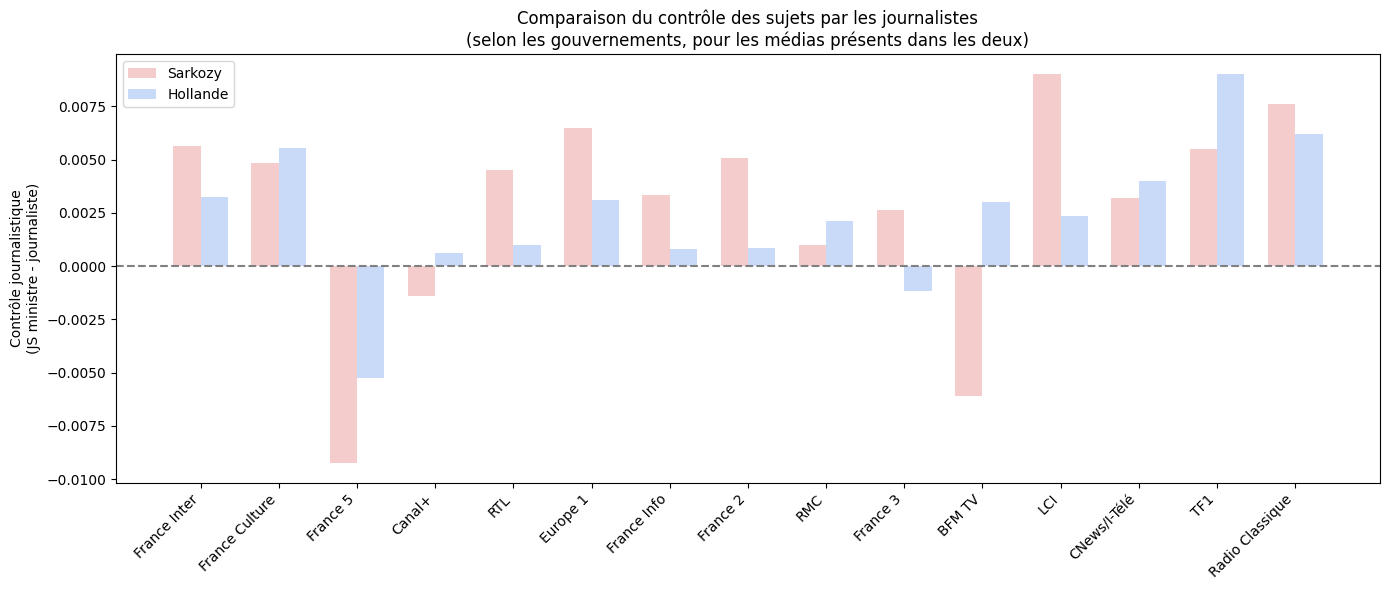

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# √âtape 1 : R√©cup√©rer les scores des m√©dias √† partir du df_lda
media_scores = df_lda[['Media_clean', 'score_media']].drop_duplicates().set_index('Media_clean')

# √âtape 2 : Fusionner avec les r√©sultats JS
df_plot = df_js_results.merge(media_scores, on='Media_clean', how='left')

# √âtape 3 : Calcul de la m√©trique de contr√¥le
df_plot['Controle_Journaliste'] = df_plot['JS_Ministre_to_Journaliste'] - df_plot['JS_Journaliste_to_Ministre']

# √âtape 4 : Trier les m√©dias par score politique
ordered_media = df_plot[['Media_clean', 'score_media']].drop_duplicates().sort_values(by='score_media')
media_list = ordered_media['Media_clean'].tolist()

# √âtape 5 : R√©organiser les donn√©es
pivot = df_plot.pivot(index='Media_clean', columns='Mandat', values='Controle_Journaliste')
pivot = pivot.reindex(media_list)

# √âtape 6 : Filtrer pour ne garder que les m√©dias avec les deux gouvernements pr√©sents (valeurs non nulles)
pivot = pivot.dropna(subset=['Sarkozy', 'Hollande'])  # Supprimer si l'une des deux est NaN

# √âtape 7 : Cr√©ation du graphique
x = np.arange(len(pivot))  # positions des groupes
width = 0.35  # largeur des barres

plt.figure(figsize=(14, 6))
bar1 = plt.bar(x - width/2, pivot['Sarkozy'], width, label='Sarkozy', color='#f4cccc')  # pastel rouge
bar2 = plt.bar(x + width/2, pivot['Hollande'], width, label='Hollande', color='#c9daf8')  # pastel bleu

plt.xticks(x, pivot.index, rotation=45, ha='right')
plt.ylabel('Contr√¥le journalistique\n(JS ministre - journaliste)')
plt.title('Comparaison du contr√¥le des sujets par les journalistes\n(selon les gouvernements, pour les m√©dias pr√©sents dans les deux)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()


### Echantillonage pour ne garder maximum que 5 interviews par ministre par media 

In [181]:
import pandas as pd

# √âtape 1 : Filtrer les partis politiques
df_lda_partis = df_lda[df_lda['parti_ministre'].isin(['PS', 'UMP'])].copy()

# √âtape 2 : Identifier les interviews uniques (par ministre + m√©dia + interview)
interview_ids = (
    df_lda_partis[['parti_ministre', 'Media_clean', 'link-href']]
    .drop_duplicates()
)

# √âtape 3 : Limiter √† 5 interviews par combinaison parti_ministre + Media_clean
interview_sampled = (
    interview_ids
    .groupby(['parti_ministre', 'Media_clean'], group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), 5), random_state=42))
)

# √âtape 4 : Filtrer le DataFrame principal pour ne garder que les interviews s√©lectionn√©es
df_lda_filtered1 = df_lda_partis[df_lda_partis['link-href'].isin(interview_sampled['link-href'])].copy()


/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/2098110670.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), 5), random_state=42))


### Conserver uniquement les ministres issus des partis PS et UMP

In [182]:
# √âtape 1 : Filtrer sur les partis PS ou UMP uniquement
df_lda_filtered2 = df_lda[df_lda['parti_ministre'].isin(['PS', 'UMP'])].copy()

# √âtape 2 : Ne garder que 5 interviews maximum par ministre et m√©dia
# On identifie les interviews uniques par 'link-href'
interview_uniques = df_lda_filtered2[['intervenants_metiers', 'Media_clean', 'link-href']].drop_duplicates()

# On groupe par ministre et m√©dia et on garde les 5 premi√®res interviews pour chaque groupe
interview_limite = (
    interview_uniques.groupby(['intervenants_metiers', 'Media_clean'])
    .head(5)
)

# √âtape 3 : Filtrer le DataFrame initial selon les interviews s√©lectionn√©es
df_lda_filtered2 = df_lda_filtered2[
    df_lda_filtered2['link-href'].isin(interview_limite['link-href'])
].copy()

# R√©sultat
print(f"{len(df_lda_filtered2)} lignes conserv√©es apr√®s filtrage.")

67366 lignes conserv√©es apr√®s filtrage.


In [183]:
# Compter le nombre d'interviews uniques par Media_clean et Mandat
interview_counts = (
    df_lda_filtered2[['Media_clean', 'Mandat', 'link-href']]
    .drop_duplicates()
    .groupby(['Media_clean', 'Mandat'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Afficher le tableau
print(interview_counts)

Mandat           Hollande  Sarkozy
Media_clean                       
BFM TV                 42        1
CNews/I-T√©l√©           57       40
Canal+                 10       26
Europe 1               87       84
France 2               62       75
France 3               11        2
France 5                2        0
France Culture         20        1
France Info            81       59
France Inter           81       71
LCI                    35       65
LCP/PubSen              6        0
RMC                    23       37
RTL                    92       75
Radio Classique        18       40
TF1                     6        1


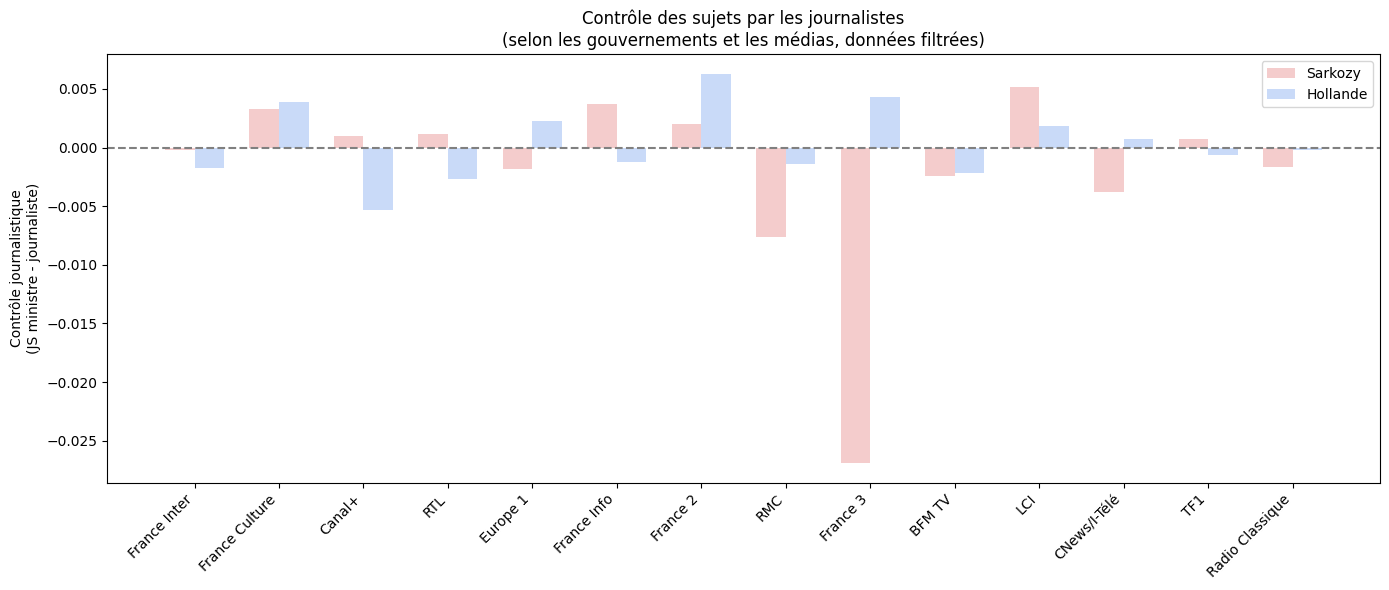

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon

# √âtape 1 : Liste des colonnes de topics
topic_cols = [f'Topic_{i}' for i in range(1, 16)]

# √âtape 2 : V√©rification colonnes num√©riques
for col in topic_cols:
    df_lda_filtered2[col] = pd.to_numeric(df_lda_filtered2[col], errors='coerce')

# √âtape 3 : Calcul des JS divergences par m√©dia et mandat
results = []
grouped = df_lda_filtered2.groupby(['Media_clean', 'Mandat'])

for (media, mandat), group in grouped:
    js_jm = []
    js_mj = []

    group = group.sort_values(by='link-href').reset_index(drop=True)
    
    for i in range(len(group) - 1):
        row_current = group.iloc[i]
        row_next = group.iloc[i + 1]

        if row_current['link-href'] != row_next['link-href']:
            continue
        if row_current[topic_cols].isna().any() or row_next[topic_cols].isna().any():
            continue

        current_vec = row_current[topic_cols].astype(float).values
        next_vec = row_next[topic_cols].astype(float).values

        if row_current['Qui_parle'] == 'Journaliste' and row_next['Qui_parle'] == 'Ministre':
            js = jensenshannon(current_vec, next_vec, base=2)
            js_jm.append(js)
        elif row_current['Qui_parle'] == 'Ministre' and row_next['Qui_parle'] == 'Journaliste':
            js = jensenshannon(current_vec, next_vec, base=2)
            js_mj.append(js)

    if js_jm and js_mj:
        results.append({
            'Media_clean': media,
            'Mandat': mandat,
            'JS_Journaliste_to_Ministre': np.mean(js_jm),
            'JS_Ministre_to_Journaliste': np.mean(js_mj)
        })

df_js_results_filtered = pd.DataFrame(results)

# √âtape 4 : Calcul de la m√©trique de contr√¥le
df_js_results_filtered['Controle_Journaliste'] = (
    df_js_results_filtered['JS_Ministre_to_Journaliste'] - df_js_results_filtered['JS_Journaliste_to_Ministre']
)

# √âtape 5 : Ajouter les scores m√©dias depuis df_lda
media_scores = df_lda[['Media_clean', 'score_media']].drop_duplicates().set_index('Media_clean')
df_plot = df_js_results_filtered.merge(media_scores, on='Media_clean', how='left')

# √âtape 6 : Trier les m√©dias par score
ordered_media = df_plot[['Media_clean', 'score_media']].drop_duplicates().sort_values(by='score_media')
media_list = ordered_media['Media_clean'].tolist()

# √âtape 7 : R√©organiser et filtrer les m√©dias ayant les deux gouvernements
pivot = df_plot.pivot(index='Media_clean', columns='Mandat', values='Controle_Journaliste')
pivot = pivot.reindex(media_list)
pivot = pivot.dropna(subset=['Sarkozy', 'Hollande'], how='any')

# √âtape 8 : Cr√©ation du graphique
x = np.arange(len(pivot))
width = 0.35

plt.figure(figsize=(14, 6))
bar1 = plt.bar(x - width/2, pivot['Sarkozy'], width, label='Sarkozy', color='#f4cccc')  # Rouge pastel
bar2 = plt.bar(x + width/2, pivot['Hollande'], width, label='Hollande', color='#c9daf8')  # Bleu pastel

plt.xticks(x, pivot.index, rotation=45, ha='right')
plt.ylabel('Contr√¥le journalistique\n(JS ministre - journaliste)')
plt.title('Contr√¥le des sujets par les journalistes\n(selon les gouvernements et les m√©dias, donn√©es filtr√©es)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

### Garder uniquement les 3 m√©dias les plus √† droites et les 3 m√©dias les plus √† gauche

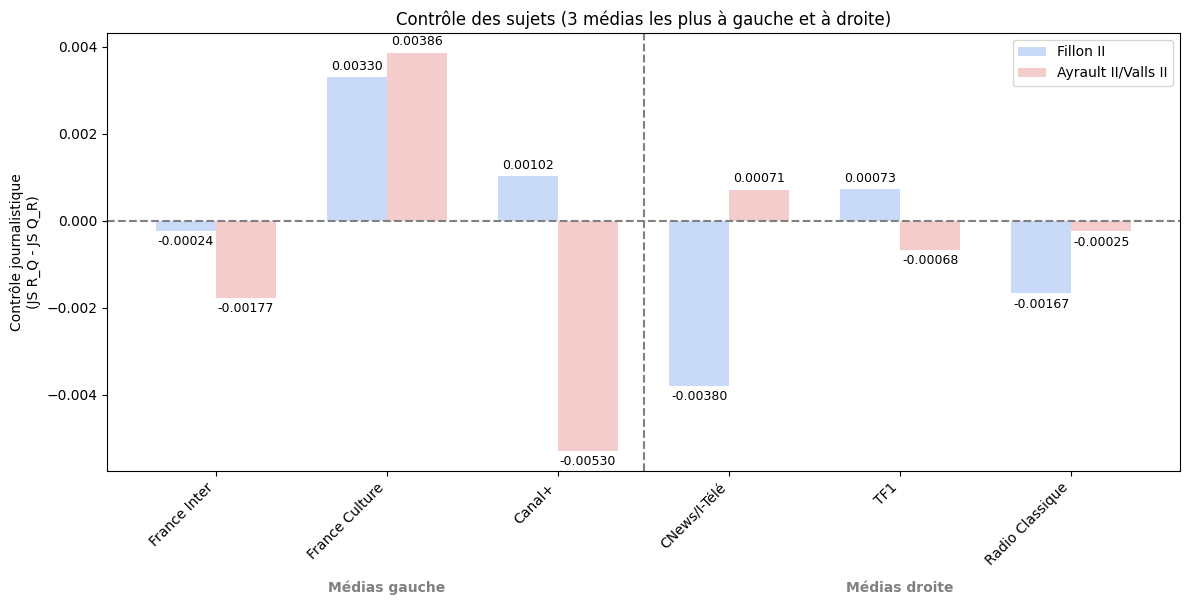

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon

# √âtape 1 : Liste des colonnes de topics
topic_cols = [f'Topic_{i}' for i in range(1, 16)]

# √âtape 2 : Assurez-vous que les colonnes sont bien num√©riques
for col in topic_cols:
    df_lda_filtered2[col] = pd.to_numeric(df_lda_filtered2[col], errors='coerce')

# √âtape 3 : Calcul des JS divergences par m√©dia et mandat
results = []
grouped = df_lda_filtered2.groupby(['Media_clean', 'Mandat'])

for (media, mandat), group in grouped:
    js_jm = []
    js_mj = []

    group = group.sort_values(by='link-href').reset_index(drop=True)
    
    for i in range(len(group) - 1):
        row_current = group.iloc[i]
        row_next = group.iloc[i + 1]

        if row_current['link-href'] != row_next['link-href']:
            continue
        if row_current[topic_cols].isna().any() or row_next[topic_cols].isna().any():
            continue

        current_vec = row_current[topic_cols].astype(float).values
        next_vec = row_next[topic_cols].astype(float).values

        if row_current['Qui_parle'] == 'Journaliste' and row_next['Qui_parle'] == 'Ministre':
            js = jensenshannon(current_vec, next_vec, base=2)
            js_jm.append(js)
        elif row_current['Qui_parle'] == 'Ministre' and row_next['Qui_parle'] == 'Journaliste':
            js = jensenshannon(current_vec, next_vec, base=2)
            js_mj.append(js)

    if js_jm and js_mj:
        results.append({
            'Media_clean': media,
            'Mandat': mandat,
            'JS_Journaliste_to_Ministre': np.mean(js_jm),
            'JS_Ministre_to_Journaliste': np.mean(js_mj)
        })

df_js_results_filtered = pd.DataFrame(results)

# √âtape 4 : Calcul de la m√©trique de contr√¥le
df_js_results_filtered['Controle_Journaliste'] = (
    df_js_results_filtered['JS_Ministre_to_Journaliste'] - df_js_results_filtered['JS_Journaliste_to_Ministre']
)

# √âtape 5 : Ajouter les scores m√©dias depuis df_lda
media_scores = df_lda[['Media_clean', 'score_media']].drop_duplicates().set_index('Media_clean')
df_plot = df_js_results_filtered.merge(media_scores, on='Media_clean', how='left')

# √âtape 6 : Trier les m√©dias par score
ordered_media = df_plot[['Media_clean', 'score_media']].drop_duplicates().sort_values(by='score_media')
media_list = ordered_media['Media_clean'].tolist()

# √âtape 7 : R√©organiser et filtrer les m√©dias ayant les deux gouvernements
pivot = df_plot.pivot(index='Media_clean', columns='Mandat', values='Controle_Journaliste')
pivot = pivot.reindex(media_list)
pivot = pivot.dropna(subset=['Sarkozy', 'Hollande'], how='any')

# √âtape 8 : S√©lectionner les 3 m√©dias les plus √† gauche et 3 les plus √† droite
pivot_subset = pd.concat([pivot.head(3), pivot.tail(3)])

# √âtape 9 : Cr√©ation du graphique
x = np.arange(len(pivot_subset))
width = 0.35

plt.figure(figsize=(12, 6))
bar1 = plt.bar(x - width/2, pivot_subset['Sarkozy'], width, label='Fillon II', color='#c9daf8')  
bar2 = plt.bar(x + width/2, pivot_subset['Hollande'], width, label='Ayrault II/Valls II', color='#f4cccc') 

plt.xticks(x, pivot_subset.index, rotation=45, ha='right')
plt.ylabel('Contr√¥le journalistique\n(JS R_Q - JS Q_R)')
plt.title('Contr√¥le des sujets (3 m√©dias les plus √† gauche et √† droite)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()

# Affichage des valeurs sur les barres avec 5 d√©cimales
for bars in [bar1, bar2]:
    for rect in bars:
        height = rect.get_height()
        offset = 0.0001
        if height >= 0:
            plt.text(rect.get_x() + rect.get_width()/2, height + offset, f"{height:.5f}", 
                     ha='center', va='bottom', fontsize=9)
        else:
            plt.text(rect.get_x() + rect.get_width()/2, height - offset, f"{height:.5f}", 
                     ha='center', va='top', fontsize=9)

# Ajouter l'espace suppl√©mentaire sous les labels
plt.subplots_adjust(bottom=0.25)

# Calculer la position verticale sous les labels (valeur n√©gative pour descendre sous les ticks)
y_text = -0.25  # Ajuste cette valeur si besoin pour descendre plus ou moins bas

# R√©cup√©rer les indices des m√©dias
index_france_culture = list(pivot_subset.index).index('France Culture')
index_tf1 = list(pivot_subset.index).index('TF1')

# Ajouter les labels sous les noms des m√©dias
plt.text(index_france_culture, y_text, "M√©dias gauche", 
         ha='center', va='top', fontsize=10, fontweight='bold', color='gray',
         transform=plt.gca().get_xaxis_transform())

plt.text(index_tf1, y_text, "M√©dias droite", 
         ha='center', va='top', fontsize=10, fontweight='bold', color='gray',
         transform=plt.gca().get_xaxis_transform())


# Ajouter la ligne pointill√©e verticale pour s√©parer gauche/droite
plt.axvline(2.5, color='gray', linestyle='--')

plt.tight_layout()
plt.show()


### R√©sultat th√©orique attendu

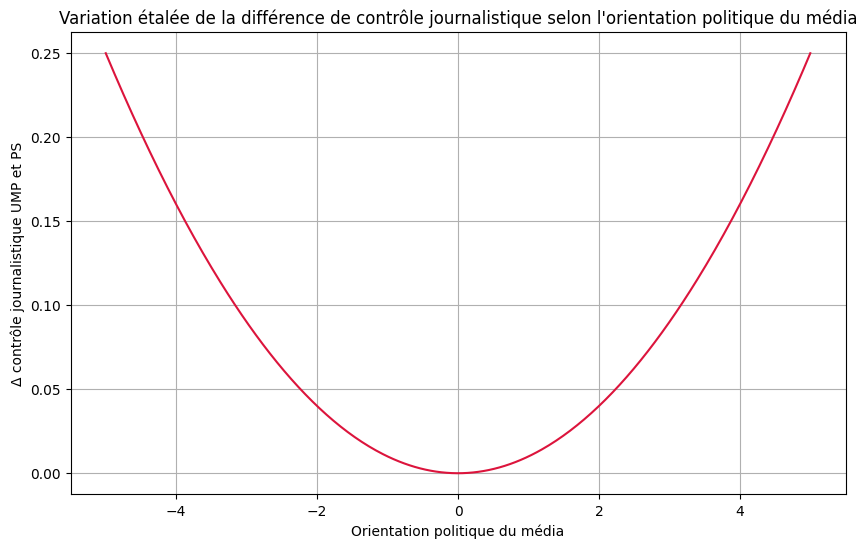

In [186]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 400)
a = 10  # facteur d'√©talement
y = (x / a)**2

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='crimson')
plt.xlabel("Orientation politique du m√©dia")
plt.ylabel("Œî contr√¥le journalistique UMP et PS")
plt.title("Variation √©tal√©e de la diff√©rence de contr√¥le journalistique selon l'orientation politique du m√©dia")
plt.grid(True)

plt.show()
